In [2]:
#For Data Wrangling/Data Processing
import numpy as np   
import pandas as pd    

#For Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.style

#For Modeling
from sklearn.linear_model import LinearRegression

#For Validation
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

#Filtering warning message
import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [3]:
df=pd.read_excel('compactiv.xlsx')

# EDA

### Top 5 rows of dataset¶

In [4]:
df.head()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
0,1,0,2147,79,68,0.2,0.2,40671.0,53995.0,0.0,...,0.0,0.0,1.6,2.6,16.00,26.40,CPU_Bound,4670,1730946,95
1,0,0,170,18,21,0.2,0.2,448.0,8385.0,0.0,...,0.0,0.0,0.0,0.0,15.63,16.83,Not_CPU_Bound,7278,1869002,97
2,15,3,2162,159,119,2.0,2.4,NaN,31950.0,0.0,...,0.0,1.2,6.0,9.4,150.20,220.20,Not_CPU_Bound,702,1021237,87
3,0,0,160,12,16,0.2,0.2,NaN,8670.0,0.0,...,0.0,0.0,0.2,0.2,15.60,16.80,Not_CPU_Bound,7248,1863704,98
4,5,1,330,39,38,0.4,0.4,NaN,12185.0,0.0,...,0.0,0.0,1.0,1.2,37.80,47.60,Not_CPU_Bound,633,1760253,90


### Last 5 rows of Dataset

In [5]:
df.tail()

,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,pgout,...,pgscan,atch,pgin,ppgin,pflt,vflt,runqsz,freemem,freeswap,usr
8187,16,12,3009,360,244,1.6,5.81,405250.0,85282.0,8.02,...,55.11,0.6,35.87,47.90,139.28,270.74,CPU_Bound,387,986647,80
8188,4,0,1596,170,146,2.4,1.80,89489.0,41764.0,3.80,...,0.20,0.8,3.80,4.40,122.40,212.60,Not_CPU_Bound,263,1055742,90
8189,16,5,3116,289,190,0.6,0.60,325948.0,52640.0,0.40,...,0.00,0.4,28.40,45.20,60.20,219.80,Not_CPU_Bound,400,969106,87
8190,32,45,5180,254,179,1.2,1.20,62571.0,29505.0,1.40,...,18.04,0.4,23.05,24.25,93.19,202.81,CPU_Bound,141,1022458,83
8191,2,0,985,55,46,1.6,4.80,111111.0,22256.0,0.00,...,0.00,0.2,3.40,6.20,91.80,110.00,CPU_Bound,659,1756514,94


### Shape of Dataset

In [6]:
df.shape

(8192, 22)

### Information of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

### Get the Summary Statistics

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lread,8192.0,NaN,NaN,NaN,19.559692,53.353799,0.0,2.0,7.0,20.0,1845.0
lwrite,8192.0,NaN,NaN,NaN,13.106201,29.891726,0.0,0.0,1.0,10.0,575.0
scall,8192.0,NaN,NaN,NaN,2306.318237,1633.617322,109.0,1012.0,2051.5,3317.25,12493.0
sread,8192.0,NaN,NaN,NaN,210.47998,198.980146,6.0,86.0,166.0,279.0,5318.0
swrite,8192.0,NaN,NaN,NaN,150.058228,160.47898,7.0,63.0,117.0,185.0,5456.0
fork,8192.0,NaN,NaN,NaN,1.884554,2.479493,0.0,0.4,0.8,2.2,20.12
exec,8192.0,NaN,NaN,NaN,2.791998,5.212456,0.0,0.2,1.2,2.8,59.56
rchar,8088.0,NaN,NaN,NaN,197385.728363,239837.493526,278.0,34091.5,125473.5,267828.75,2526649.0
wchar,8177.0,NaN,NaN,NaN,95902.992785,140841.707911,1498.0,22916.0,46619.0,106101.0,1801623.0
pgout,8192.0,NaN,NaN,NaN,2.285317,5.307038,0.0,0.0,0.0,2.4,81.44


### Check for Null Values

In [9]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

### Check for Object Data Type

### unique values for categorical variables

In [10]:
df['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [11]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

Description of lread
----------------------------------------------------------------------------
count    8192.000000
mean       19.559692
std        53.353799
min         0.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      1845.000000
Name: lread, dtype: float64 Distribution of lread
----------------------------------------------------------------------------


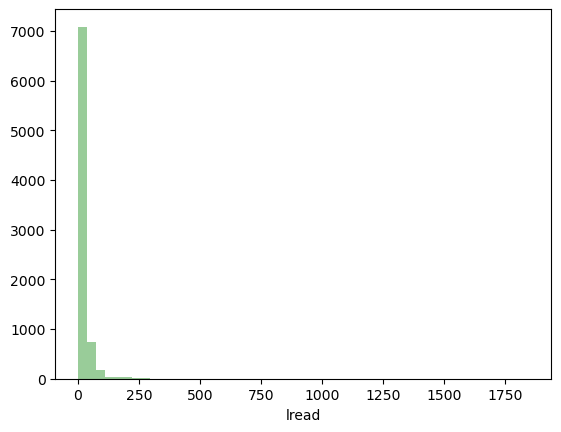

BoxPlot of lread
----------------------------------------------------------------------------


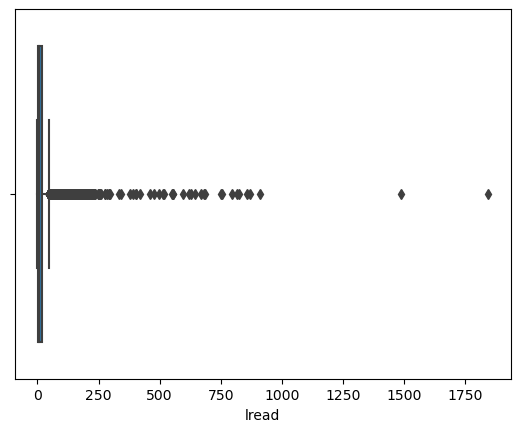

Description of lwrite
----------------------------------------------------------------------------
count    8192.000000
mean       13.106201
std        29.891726
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max       575.000000
Name: lwrite, dtype: float64 Distribution of lwrite
----------------------------------------------------------------------------


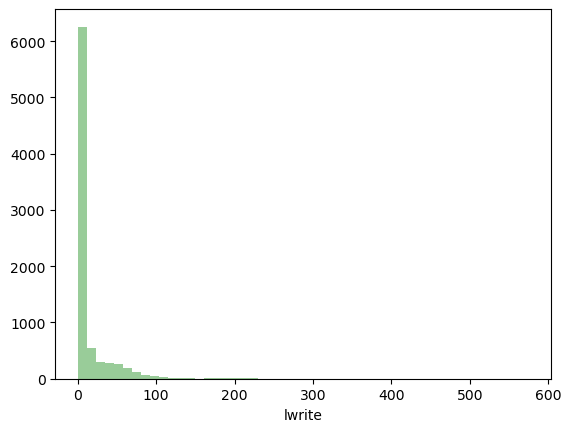

BoxPlot of lwrite
----------------------------------------------------------------------------


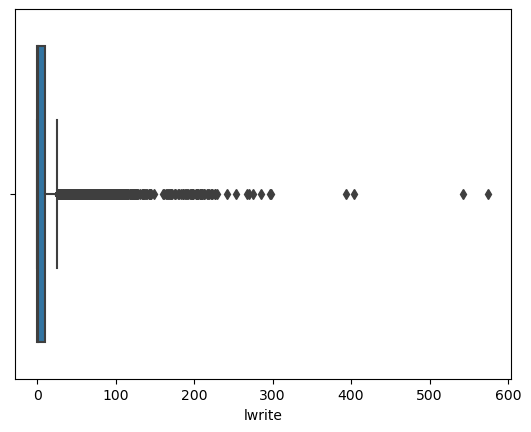

Description of scall
----------------------------------------------------------------------------
count     8192.000000
mean      2306.318237
std       1633.617322
min        109.000000
25%       1012.000000
50%       2051.500000
75%       3317.250000
max      12493.000000
Name: scall, dtype: float64 Distribution of scall
----------------------------------------------------------------------------


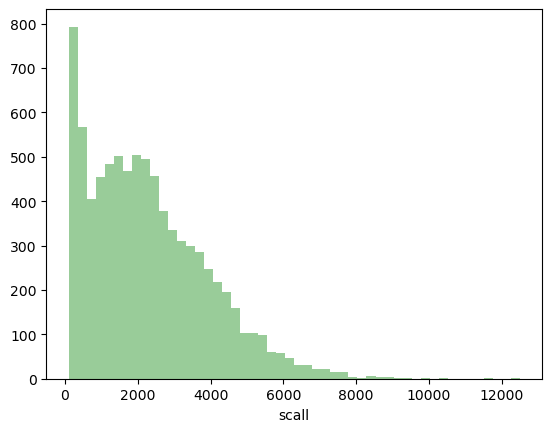

BoxPlot of scall
----------------------------------------------------------------------------


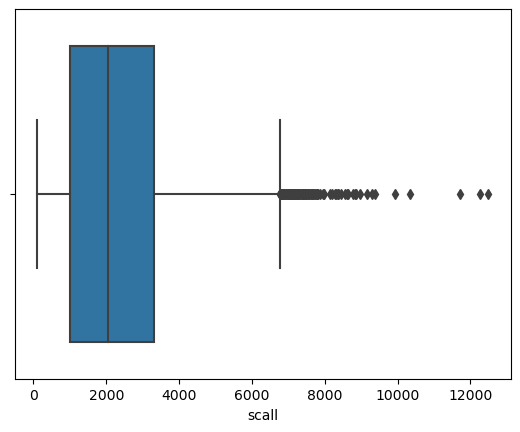

Description of sread
----------------------------------------------------------------------------
count    8192.000000
mean      210.479980
std       198.980146
min         6.000000
25%        86.000000
50%       166.000000
75%       279.000000
max      5318.000000
Name: sread, dtype: float64 Distribution of sread
----------------------------------------------------------------------------


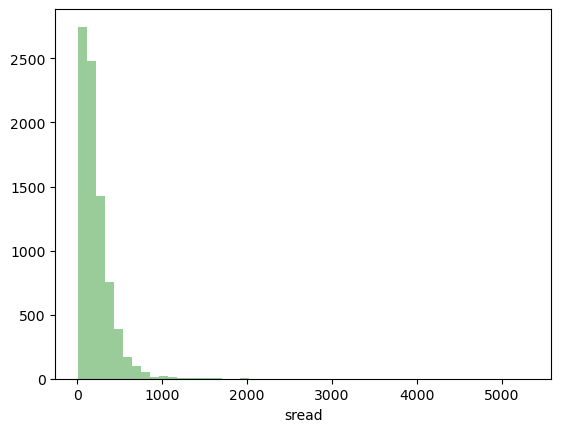

BoxPlot of sread
----------------------------------------------------------------------------


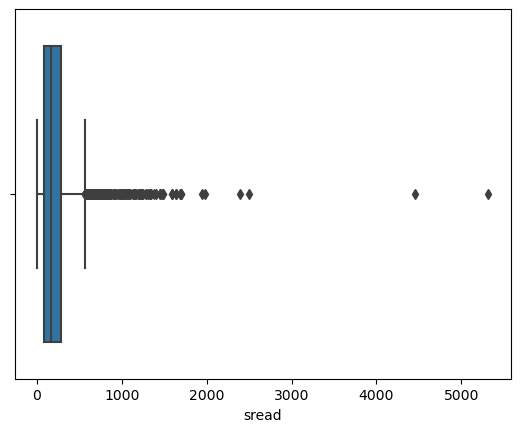

Description of swrite
----------------------------------------------------------------------------
count    8192.000000
mean      150.058228
std       160.478980
min         7.000000
25%        63.000000
50%       117.000000
75%       185.000000
max      5456.000000
Name: swrite, dtype: float64 Distribution of swrite
----------------------------------------------------------------------------


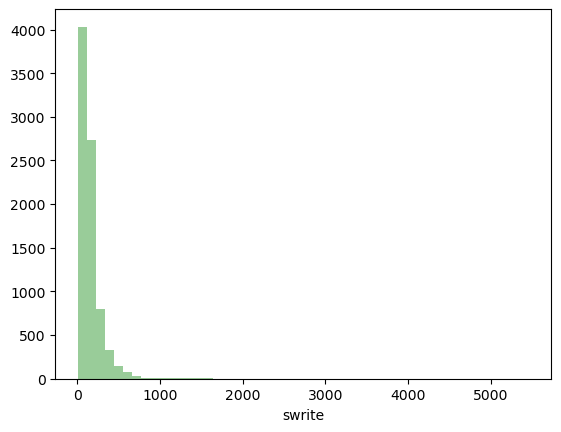

BoxPlot of swrite
----------------------------------------------------------------------------


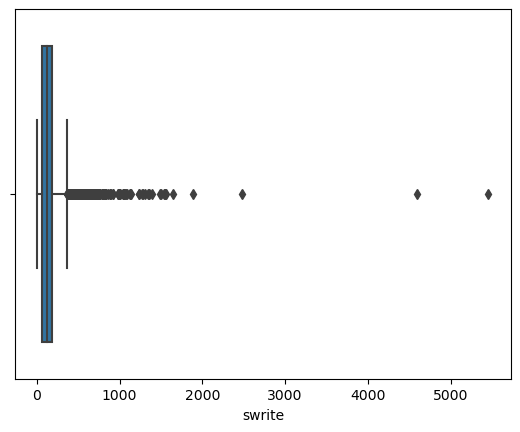

Description of fork
----------------------------------------------------------------------------
count    8192.000000
mean        1.884554
std         2.479493
min         0.000000
25%         0.400000
50%         0.800000
75%         2.200000
max        20.120000
Name: fork, dtype: float64 Distribution of fork
----------------------------------------------------------------------------


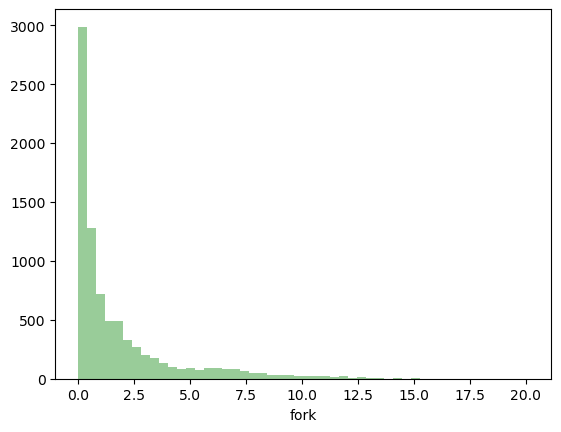

BoxPlot of fork
----------------------------------------------------------------------------


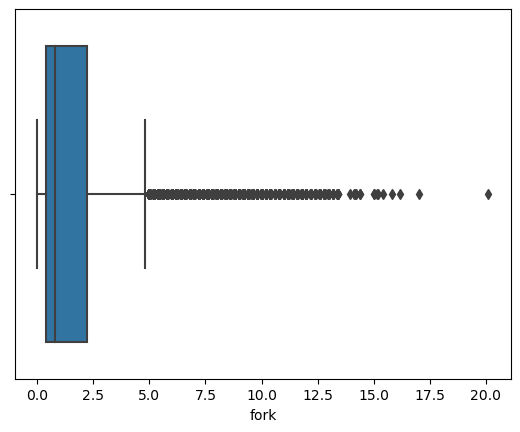

Description of exec
----------------------------------------------------------------------------
count    8192.000000
mean        2.791998
std         5.212456
min         0.000000
25%         0.200000
50%         1.200000
75%         2.800000
max        59.560000
Name: exec, dtype: float64 Distribution of exec
----------------------------------------------------------------------------


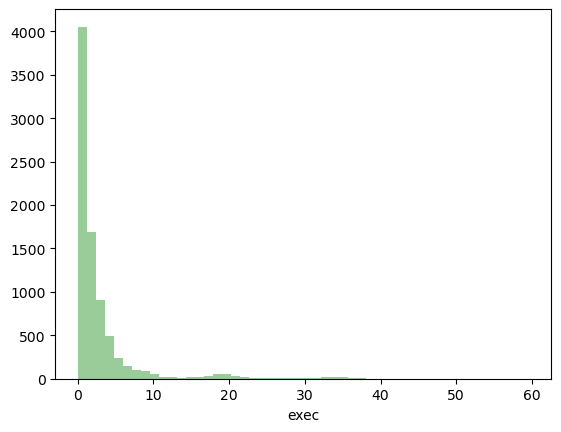

BoxPlot of exec
----------------------------------------------------------------------------


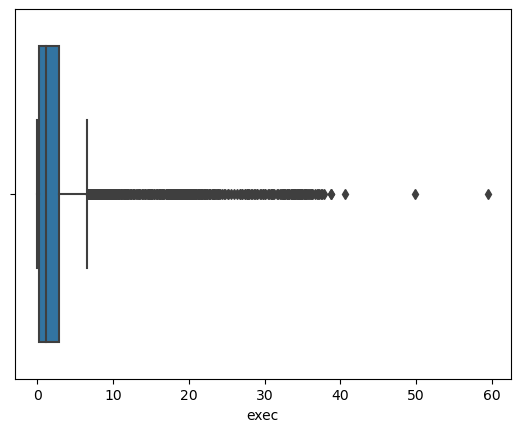

Description of rchar
----------------------------------------------------------------------------
count    8.088000e+03
mean     1.973857e+05
std      2.398375e+05
min      2.780000e+02
25%      3.409150e+04
50%      1.254735e+05
75%      2.678288e+05
max      2.526649e+06
Name: rchar, dtype: float64 Distribution of rchar
----------------------------------------------------------------------------


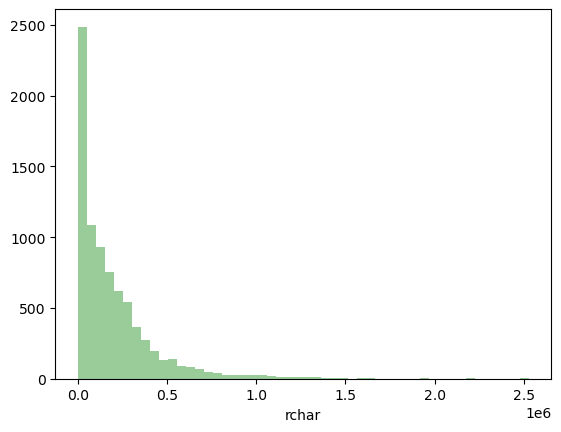

BoxPlot of rchar
----------------------------------------------------------------------------


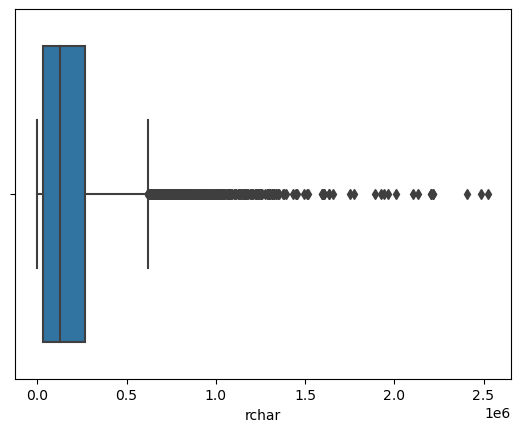

Description of wchar
----------------------------------------------------------------------------
count    8.177000e+03
mean     9.590299e+04
std      1.408417e+05
min      1.498000e+03
25%      2.291600e+04
50%      4.661900e+04
75%      1.061010e+05
max      1.801623e+06
Name: wchar, dtype: float64 Distribution of wchar
----------------------------------------------------------------------------


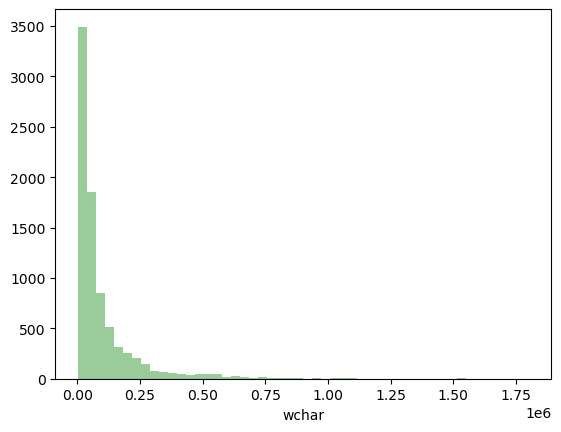

BoxPlot of wchar
----------------------------------------------------------------------------


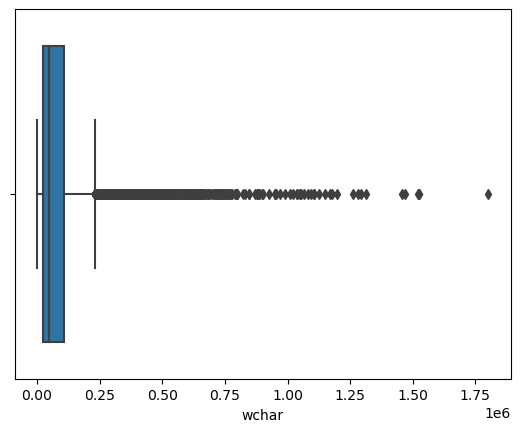

Description of pgout
----------------------------------------------------------------------------
count    8192.000000
mean        2.285317
std         5.307038
min         0.000000
25%         0.000000
50%         0.000000
75%         2.400000
max        81.440000
Name: pgout, dtype: float64 Distribution of pgout
----------------------------------------------------------------------------


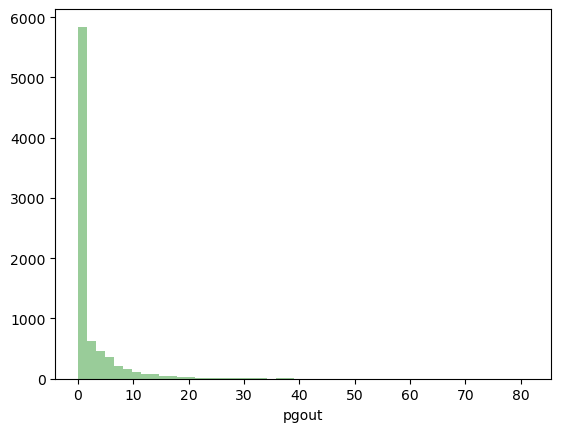

BoxPlot of pgout
----------------------------------------------------------------------------


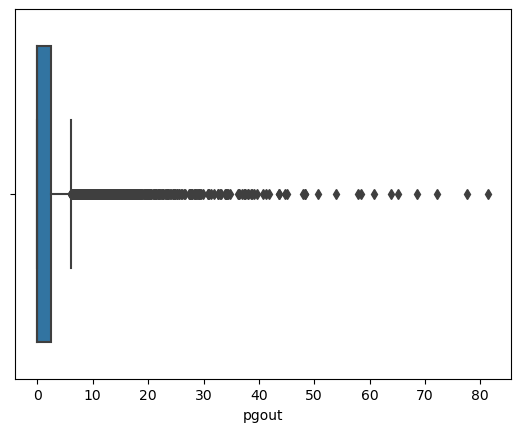

Description of ppgout
----------------------------------------------------------------------------
count    8192.000000
mean        5.977229
std        15.214590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.200000
max       184.200000
Name: ppgout, dtype: float64 Distribution of ppgout
----------------------------------------------------------------------------


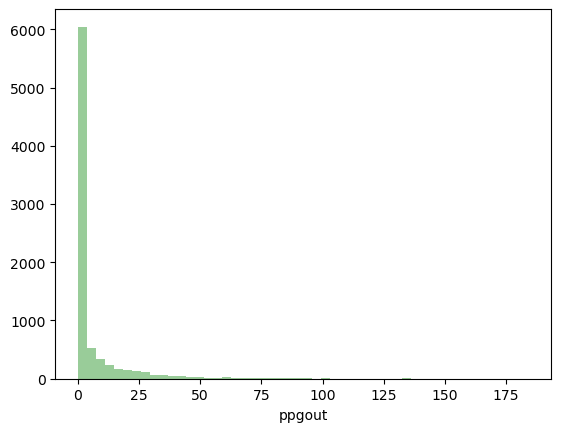

BoxPlot of ppgout
----------------------------------------------------------------------------


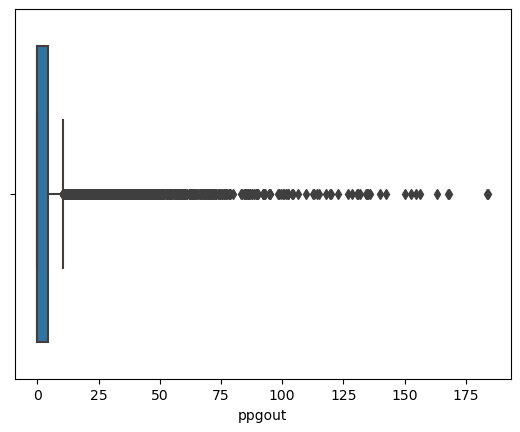

Description of pgfree
----------------------------------------------------------------------------
count    8192.000000
mean       11.919712
std        32.363520
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       523.000000
Name: pgfree, dtype: float64 Distribution of pgfree
----------------------------------------------------------------------------


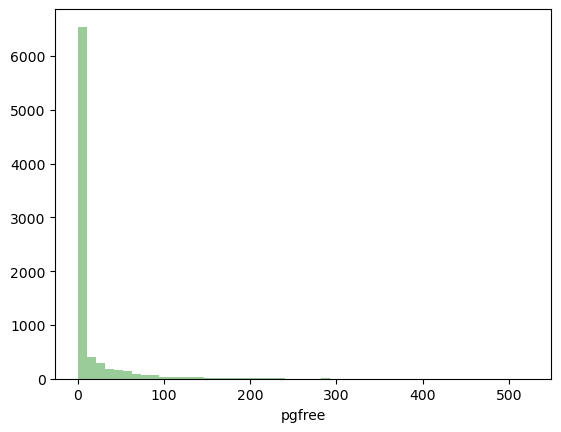

BoxPlot of pgfree
----------------------------------------------------------------------------


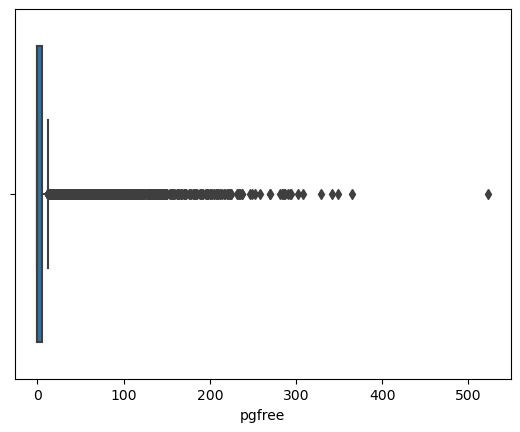

Description of pgscan
----------------------------------------------------------------------------
count    8192.000000
mean       21.526849
std        71.141340
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1237.000000
Name: pgscan, dtype: float64 Distribution of pgscan
----------------------------------------------------------------------------


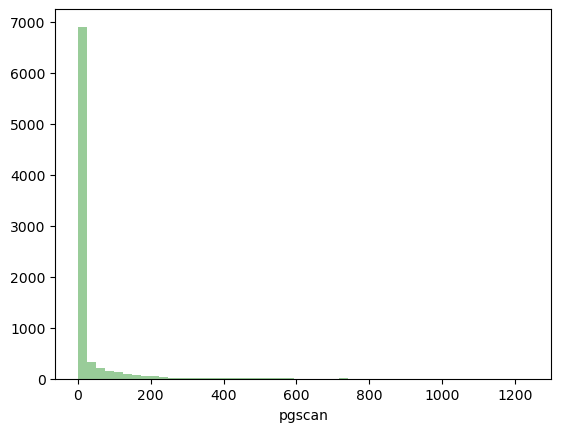

BoxPlot of pgscan
----------------------------------------------------------------------------


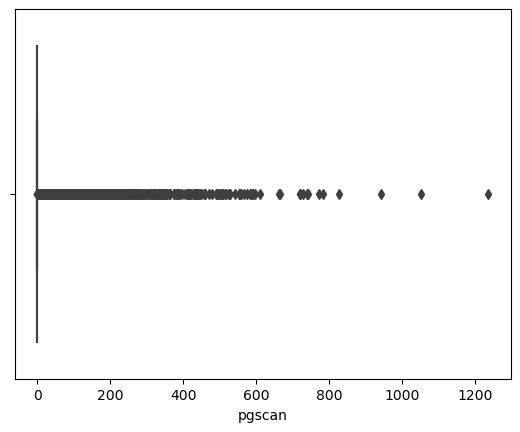

Description of atch
----------------------------------------------------------------------------
count    8192.000000
mean        1.127505
std         5.708347
min         0.000000
25%         0.000000
50%         0.000000
75%         0.600000
max       211.580000
Name: atch, dtype: float64 Distribution of atch
----------------------------------------------------------------------------


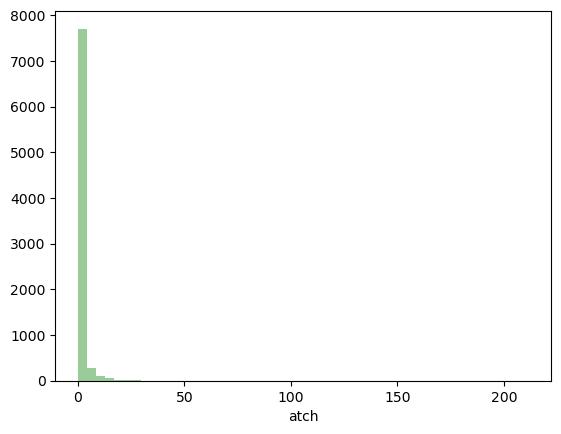

BoxPlot of atch
----------------------------------------------------------------------------


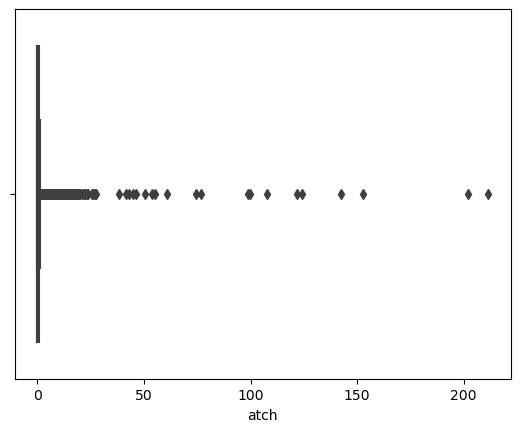

Description of pgin
----------------------------------------------------------------------------
count    8192.000000
mean        8.277960
std        13.874978
min         0.000000
25%         0.600000
50%         2.800000
75%         9.765000
max       141.200000
Name: pgin, dtype: float64 Distribution of pgin
----------------------------------------------------------------------------


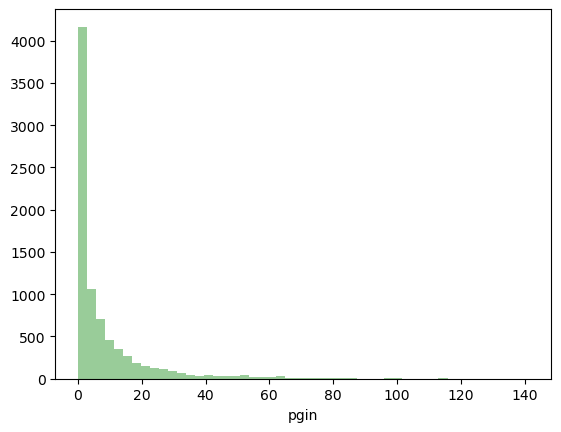

BoxPlot of pgin
----------------------------------------------------------------------------


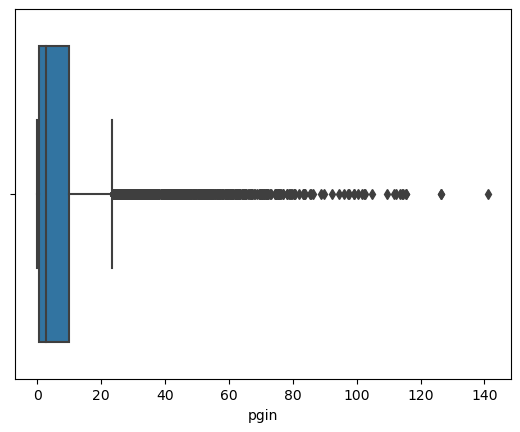

Description of ppgin
----------------------------------------------------------------------------
count    8192.000000
mean       12.388586
std        22.281318
min         0.000000
25%         0.600000
50%         3.800000
75%        13.800000
max       292.610000
Name: ppgin, dtype: float64 Distribution of ppgin
----------------------------------------------------------------------------


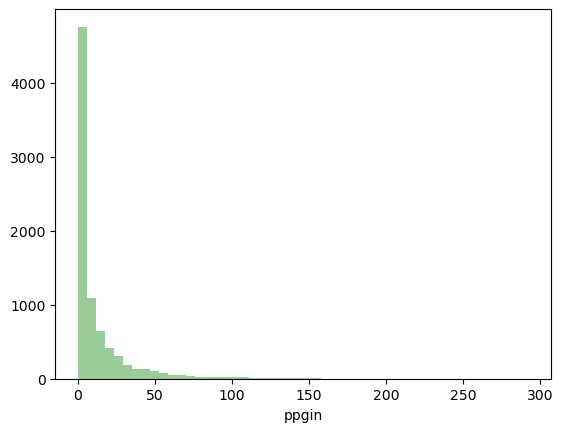

BoxPlot of ppgin
----------------------------------------------------------------------------


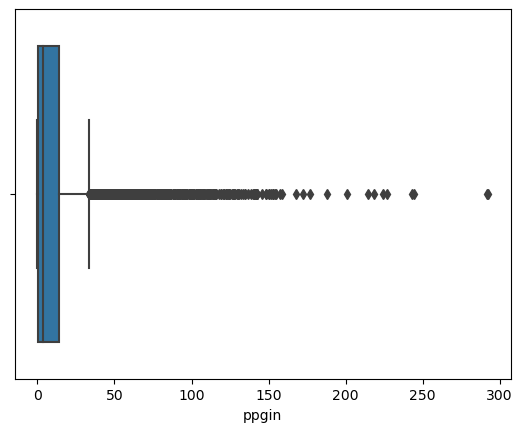

Description of pflt
----------------------------------------------------------------------------
count    8192.000000
mean      109.793799
std       114.419221
min         0.000000
25%        25.000000
50%        63.800000
75%       159.600000
max       899.800000
Name: pflt, dtype: float64 Distribution of pflt
----------------------------------------------------------------------------


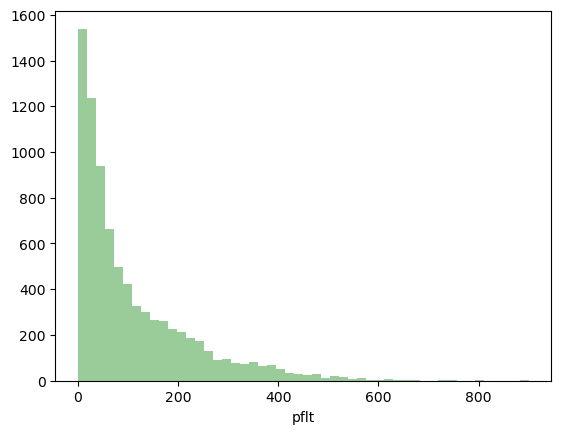

BoxPlot of pflt
----------------------------------------------------------------------------


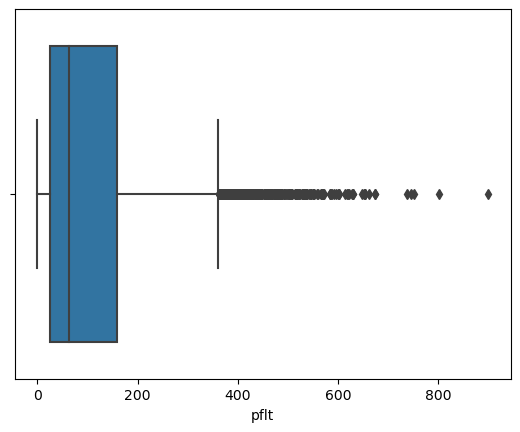

Description of vflt
----------------------------------------------------------------------------
count    8192.000000
mean      185.315796
std       191.000603
min         0.200000
25%        45.400000
50%       120.400000
75%       251.800000
max      1365.000000
Name: vflt, dtype: float64 Distribution of vflt
----------------------------------------------------------------------------


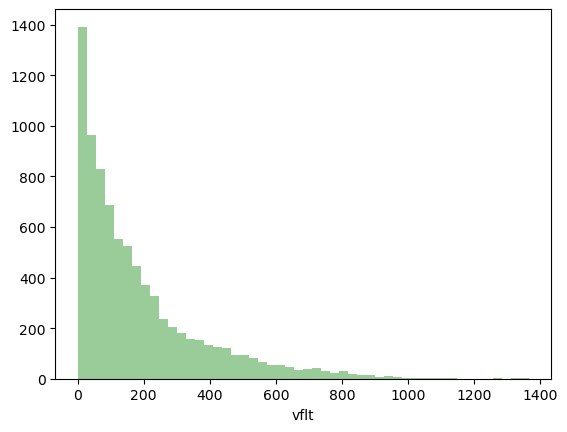

BoxPlot of vflt
----------------------------------------------------------------------------


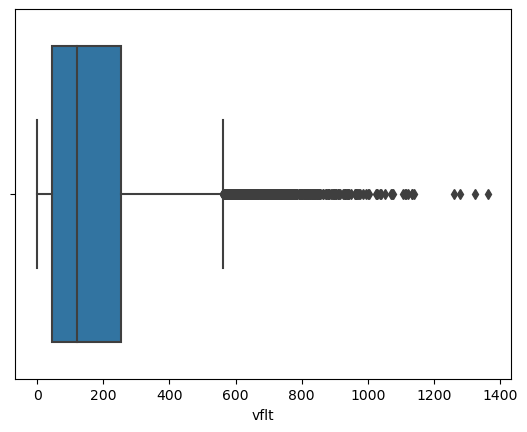

Description of runqsz
----------------------------------------------------------------------------
count              8192
unique                2
top       Not_CPU_Bound
freq               4331
Name: runqsz, dtype: object Distribution of runqsz
----------------------------------------------------------------------------


ValueError: could not convert string to float: 'CPU_Bound'

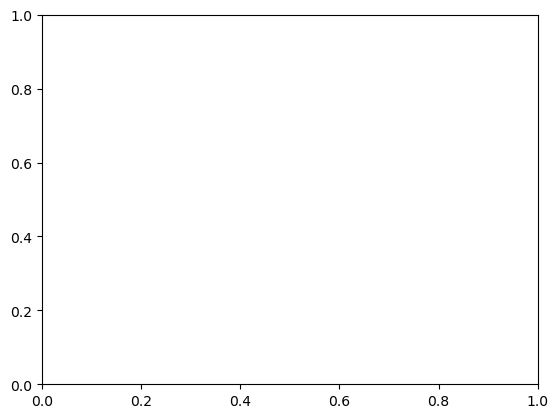

In [12]:
for x in df:
    univariateAnalysis_numeric(x,20)

In [ ]:
plt.title('scatterplot:pgfree vs pgscan')
plt.scatter(df['pgfree'],df['pgscan'])

In [ ]:
plt.title('scatterplot:usr vs exec')
plt.scatter(df['fork'],df['usr'])

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

### Check for Null Values

In [ ]:
df.isnull().sum()

### Imputing missing values

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()        

In [ ]:
df.head()

In [ ]:
df.describe()

### Check for Duplicates

In [ ]:
 #Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

In [ ]:
df.head()

### Correlation Plot

In [ ]:
## Checking on the correlation between the variables
Cor=df.corr(method='pearson')
plt.figure(figsize=(25,15))
mask = np.array (Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask, vmax =1, vmin=-1, cmap ='coolwarm');

### Encoding the data

In [ ]:
#get dummies will convert the categorical columns into binary output
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

### Outlier Checks

In [ ]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

### Outlier Treatment

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

In [ ]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Encoding the data

### One-hot encoding is a method of encoding categorical variables into a set of binary variables. For each categorical variable, one binary variable is created for each category. The binary variable is set to 1 if the observation belongs to that category, and 0 otherwise.

### Converting categorical to dummy variables

#get dummies will convert the categorical columns into binary output
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)

In [ ]:
df.head()

### Separate X and Y

In [ ]:
## Now dataset is ready for linear regression.We seperate the dependent and independent variables

# Copy all the predictor variables into X dataframe
X = df.drop('usr', axis=1)

# Copy target into the y dataframe. 
y = df[['usr']]

In [ ]:
#Checking Independent Variables - Inputs
X.head()

In [ ]:
# Checking the Dependent Variable -Output
y.head()

### Train-Test Split

In [ ]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

### Linear Regression using statsmodel(OLS)

In [ ]:
import statsmodels.api as sm

In [ ]:

X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [ ]:
X_train.info()

In [ ]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

AS few predictors have VIF values > 5 therefore there is some multicolinearity in the data 
We remove those predictors with multicolinarity due to which there is least impact on the adjusted R2

pgscan contains NaN values so we drop this column

In [ ]:
X_train = X_train.drop(["pgscan"], axis=1)

In [ ]:

#1) Removing predictor 'fork' as VIF>5
X_train2 = X_train.drop(["fork"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

In [ ]:
#2) Removing predictor 'pgout' as VIF>5
X_train3 = X_train.drop(["pgout"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

In [ ]:
X_train4 = X_train.drop(["ppgout"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

In [ ]:
X_train5 = X_train.drop(["pgfree"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

In [ ]:

X_train6 = X_train.drop(["pgin"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

In [ ]:

X_train7 = X_train.drop(["ppgin"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

In [ ]:
X_train8 = X_train.drop(["pflt"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train8)
olsres_7 = olsmod_7.fit()
print(
    "R-squared:",
    np.round(olsres_7.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_7.rsquared_adj, 3),
)

In [ ]:
0.796 -0.786

Seems like an important predictor and thus wouldnot choose to drop it .

In [ ]:
X_train9 = X_train.drop(["vflt"], axis=1)
olsmod_8 = sm.OLS(y_train, X_train9)
olsres_8 = olsmod_8.fit()
print(
    "R-squared:",
    np.round(olsres_8.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_8.rsquared_adj, 3),
)

In [ ]:
X_train = X_train.drop(["ppgout","pgfree","vflt","ppgin","pgin","fork"], axis=1)

In [ ]:
olsmod_8 = sm.OLS(y_train, X_train)
olsres_8 = olsmod_8.fit()
print(olsres_8.summary())

In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

In [ ]:
X_train10 = X_train.drop(["lread"], axis=1)
olsmod_9 = sm.OLS(y_train, X_train10)
olsres_9 = olsmod_9.fit()
print(
    "R-squared:",
    np.round(olsres_9.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_9.rsquared_adj, 3),
)

In [ ]:
0.792-0.789

In [ ]:
X_train11 = X_train.drop(["sread"], axis=1)
olsmod_10 = sm.OLS(y_train, X_train11)
olsres_10 = olsmod_10.fit()
print(
    "R-squared:",
    np.round(olsres_10.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_10.rsquared_adj, 3),
)

In [ ]:
X_train12 = X_train.drop(["swrite"], axis=1)
olsmod_11 = sm.OLS(y_train, X_train12)
olsres_11 = olsmod_11.fit()
print(
    "R-squared:",
    np.round(olsres_11.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_11.rsquared_adj, 3),
)

In [ ]:
X_train = X_train.drop(["sread","swrite","lread"], axis=1)

In [ ]:
olsmod_12 = sm.OLS(y_train, X_train)
olsres_12 = olsmod_12.fit()
print(olsres_12.summary())

In [ ]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series3))

# Testing the Assumptions of Linear Regression


For Linear Regression, we need to check if the following assumptions hold:




1. Linearity

2.Independence

3.Homoscedasticity

4.Normality of error terms

5.No strong Multicollinearity

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_12.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_12.resid.values  # residuals

df_pred.head()

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No pattern in the data thus the assumption of linearity and independence of predictors satisfied

### Durbin - Watson Test

In [ ]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(df_pred["Residuals"], axis=0)

The value is approxiately equal to 2 states there is no auto correlation between errors

### Test for Normality

In [ ]:
# Test for Normality
sns.histplot(df_pred["Residuals"], kde =True) 
print("Skew :",df_pred["Residuals"].skew()) 
plt.title("Normality of Residuals") 
plt.show()

In [ ]:
#Statistical Test for Normality
#Null Hypothesis - Data is normal
#Alternate Hypothesis - Data is non-normal
import scipy.stats as stats
stats.shapiro(df_pred["Residuals"])

 Since p-value < 0.05, the residuals are not normal as per shapiro test.

#### Test for Homoscedasticity


In [ ]:
import statsmodels.stats.api as sms
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]

Since p-value > 0.05 we can say that the residuals are homoscedastic.


### Test for Independence of Errors

In [ ]:
# Plot of the QQ Curve
import statsmodels.api as sm
fig = sm.qqplot(df_pred["Residuals"],fit=True,line='45')
plt.show()

In [ ]:
import pylab
import scipy.stats as stats 
stats.probplot(df_pred["Residuals"],dist ="norm", plot =pylab) 
plt.title("Probability Plot - Normality of Residuals") 
plt.show()

### The model built olsmod_12 satisfies all assumptions of Linear Regression

In [ ]:
olsres_12.summary()

In [ ]:
plt.scatter(df_pred["Actual Values"], df_pred["Fitted Values"]) 
plt.title("Actual Vs Fitted Values") 
plt.xlabel("Actual") 
plt.ylabel("Fitted") 
plt.show()

### Predictions

In [ ]:
X_train.columns

In [ ]:
X_test.columns

In [ ]:
# dropping columns from the test data that are not there in the training data
X_test = X_test.drop(["ppgout","pgfree","vflt","ppgin","pgin","fork","sread","swrite","lread","pgscan"], axis=1)

In [ ]:
# let's make predictions on the test and train set
y_pred_test = olsres_12.predict(X_test)
y_pred_train = olsres_12.predict(X_train)

In [ ]:
y_pred_train

In [ ]:
y_pred_test

In [ ]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# let's check the RMSE on the train data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_train

In [ ]:
np.sqrt(olsres_12.mse_resid)

In [ ]:
# let's check the RMSE on the test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse_test

### The model equation will be as follows:

In [ ]:
# Let us write the equation of linear regression
Equation = "usr ="
print(Equation, end=" ")
for i in range(len(X_train.columns)):
    if i == 0:
        print(olsres_12.params[i], "+", end=" ")
    elif i != len(X_train.columns) - 1:
        print(
            olsres_12.params[i],
            "* (",
            X_train.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_12.params[i], "* (", X_train.columns[i], ")")

# Linear Regression using (sklearn)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

In [ ]:
#Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

In [ ]:
# Creating a proper dataframe
model_coeff = pd.DataFrame()
model_coeff["Columns"]= X_train.columns
model_coeff['Coefficient Estimate'] = round (pd.Series(regression_model.coef_[0]),3)
print(model_coeff)

In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

In [ ]:
# Visualizing the coefficients
plt.subplots(figsize = (8, 6))
ax=sns.barplot(x = 'Columns', y = 'Coefficient Estimate', data = model_coeff)
ax.bar_label(ax.containers[0], label_type='edge', color = 'red', rotation =0, fontsize = 10, padding =5) #matplotlib version is above 3.4
plt.xticks(rotation=90);
plt.show()

In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

In [ ]:
#Train Predictions
predicted_train=regression_model.predict(X_train)
predicted_train

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

In [ ]:
#Test Predictions
predicted_test=regression_model.predict(X_test)
predicted_test

In [ ]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

# Problem 2: Logistic Regression, LDA and CART

### Import the necessary libraries and load the dataset.

In [14]:
# Importing the necessary packages

# For Data Wrangling Data Processing
import numpy as np 
import pandas as pd

# Data Visualizaiton
import matplotlib.pyplot as plt 
import seaborn as sns

# For Modeling
from sklearn.linear_model import LogisticRegression

#For Model Performance and Tuning 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Filtering warning message
from warnings import filterwarnings 
filterwarnings ("ignore")

In [15]:
wife_data=pd.read_excel('Contraceptive_method_dataset.xlsx')

### Top 5 rows of Dataset

In [16]:
wife_data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


### Last 5 rows of datset

In [17]:
wife_data.tail()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
1468,33.0,Tertiary,Tertiary,NaN,Scientology,Yes,2,Very High,Exposed,Yes
1469,33.0,Tertiary,Tertiary,NaN,Scientology,No,1,Very High,Exposed,Yes
1470,39.0,Secondary,Secondary,NaN,Scientology,Yes,1,Very High,Exposed,Yes
1471,33.0,Secondary,Secondary,NaN,Scientology,Yes,2,Low,Exposed,Yes
1472,17.0,Secondary,Secondary,1.0,Scientology,No,2,Very High,Exposed,Yes


### Shape of Dataset

In [18]:
wife_data.shape

(1473, 10)

### Check for duplicate

In [19]:
dups = wife_data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 80


### check for missing values

In [20]:
wife_data.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

### Impute missing values

In [21]:
for column in wife_data.columns:
    if wife_data[column].dtype != 'object':
        median = wife_data[column].median()
        wife_data[column] = wife_data[column].fillna(median).astype(int)   
        
wife_data.isnull().sum()    

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

### check the Info

In [22]:
wife_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Wife_age                   1473 non-null   int32 
 1   Wife_ education            1473 non-null   object
 2   Husband_education          1473 non-null   object
 3   No_of_children_born        1473 non-null   int32 
 4   Wife_religion              1473 non-null   object
 5   Wife_Working               1473 non-null   object
 6   Husband_Occupation         1473 non-null   int32 
 7   Standard_of_living_index   1473 non-null   object
 8   Media_exposure             1473 non-null   object
 9   Contraceptive_method_used  1473 non-null   object
dtypes: int32(3), object(7)
memory usage: 97.9+ KB


Husband_Occupation showing int datatype so we need to change it  in categorical.

In [23]:
wife_data['Husband_Occupation'] = wife_data['Husband_Occupation'].astype('object')
wife_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Wife_age                   1473 non-null   int32 
 1   Wife_ education            1473 non-null   object
 2   Husband_education          1473 non-null   object
 3   No_of_children_born        1473 non-null   int32 
 4   Wife_religion              1473 non-null   object
 5   Wife_Working               1473 non-null   object
 6   Husband_Occupation         1473 non-null   object
 7   Standard_of_living_index   1473 non-null   object
 8   Media_exposure             1473 non-null   object
 9   Contraceptive_method_used  1473 non-null   object
dtypes: int32(2), object(8)
memory usage: 103.7+ KB


### Descriptive Analysis

In [24]:
wife_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wife_age,1473.0,NaN,NaN,NaN,32.577054,8.073941,16.0,26.0,32.0,38.0,49.0
Wife_ education,1473,4,Tertiary,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_education,1473,4,Tertiary,899,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_children_born,1473.0,NaN,NaN,NaN,3.250509,2.348473,0.0,1.0,3.0,4.0,16.0
Wife_religion,1473,2,Scientology,1253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wife_Working,1473,2,No,1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Husband_Occupation,1473.0,4.0,3.0,585.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard_of_living_index,1473,4,Very High,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Media_exposure,1473,2,Exposed,1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contraceptive_method_used,1473,2,Yes,844,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Geting unique counts of all Objects¶

In [25]:
for feature in wife_data.columns: 
    if wife_data[feature].dtype == 'object': 
        print(feature)
        print(wife_data[feature].value_counts())
        print('\n')

Wife_ education
Tertiary      577
Secondary     410
Primary       334
Uneducated    152
Name: Wife_ education, dtype: int64


Husband_education
Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64


Wife_religion
Scientology        1253
Non-Scientology     220
Name: Wife_religion, dtype: int64


Wife_Working
No     1104
Yes     369
Name: Wife_Working, dtype: int64


Husband_Occupation
3    585
1    436
2    425
4     27
Name: Husband_Occupation, dtype: int64


Standard_of_living_index
Very High    684
High         431
Low          229
Very Low     129
Name: Standard_of_living_index, dtype: int64


Media_exposure 
Exposed        1364
Not-Exposed     109
Name: Media_exposure , dtype: int64


Contraceptive_method_used
Yes    844
No     629
Name: Contraceptive_method_used, dtype: int64




### Univariate Analysis

### Checking the spread of the data using boxplot for the continuous variables.

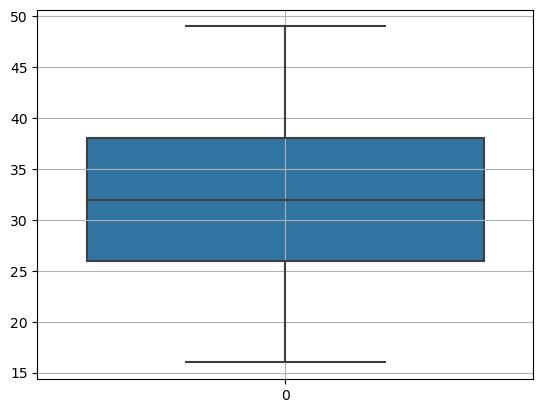

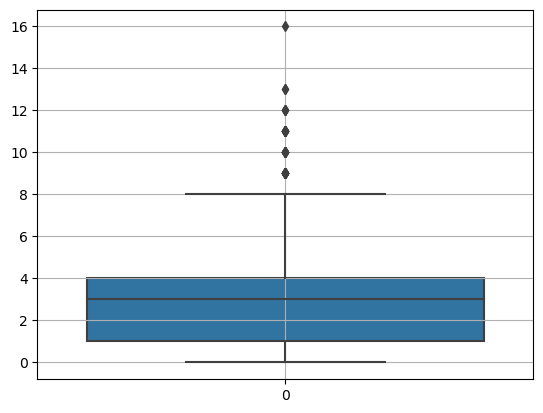

In [26]:
cols = ['Wife_age','No_of_children_born']
for i in cols:
    sns.boxplot(wife_data[i],whis=1.5)
    plt.grid()
    plt.show();

### Bivariate and Multivariate Analysis

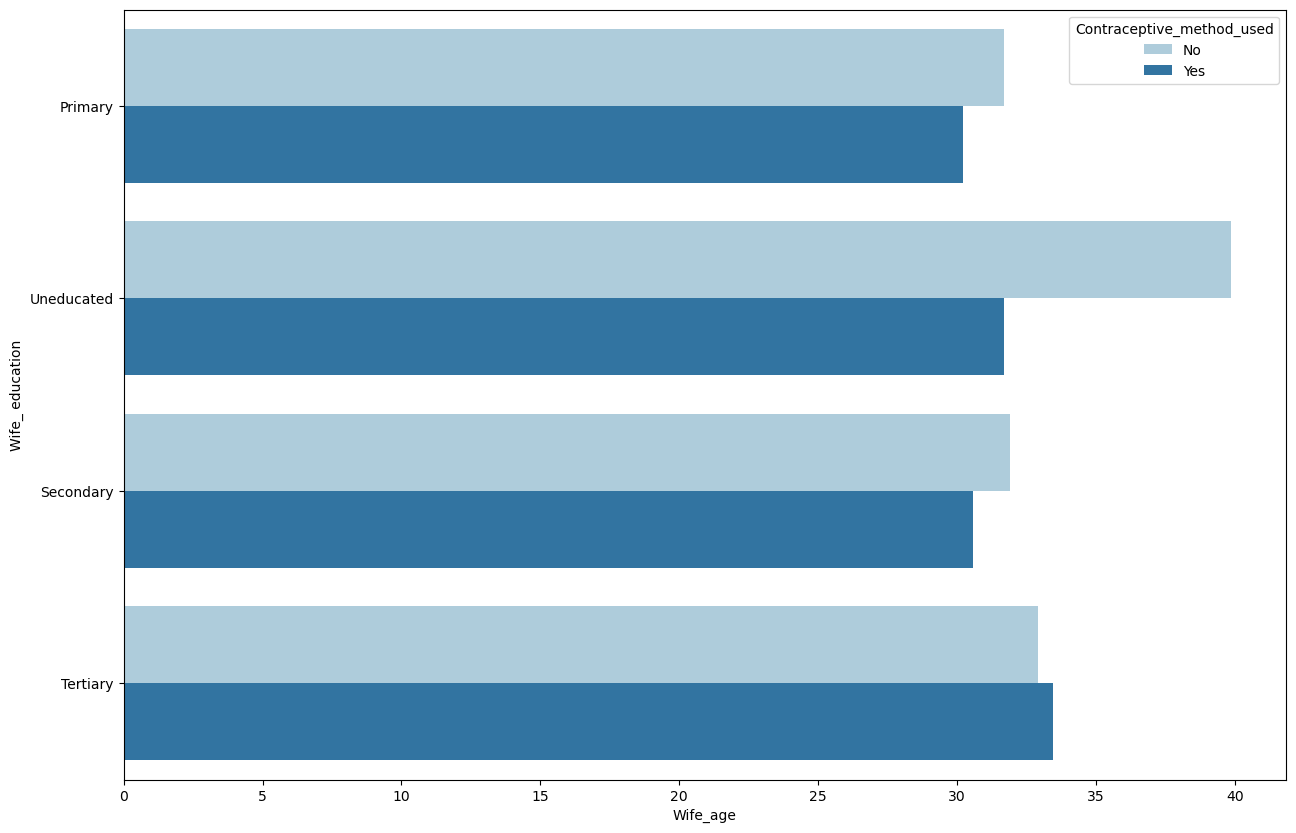

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x='Wife_age', y='Wife_ education', hue='Contraceptive_method_used', data=wife_data, palette= 'Paired', ci=None);

 uneducated woman having age  40  has highest count for not using Contraceptive_method.
 

women having Tertiary education and having age near about 34 use highest amount of Contraceptive_method

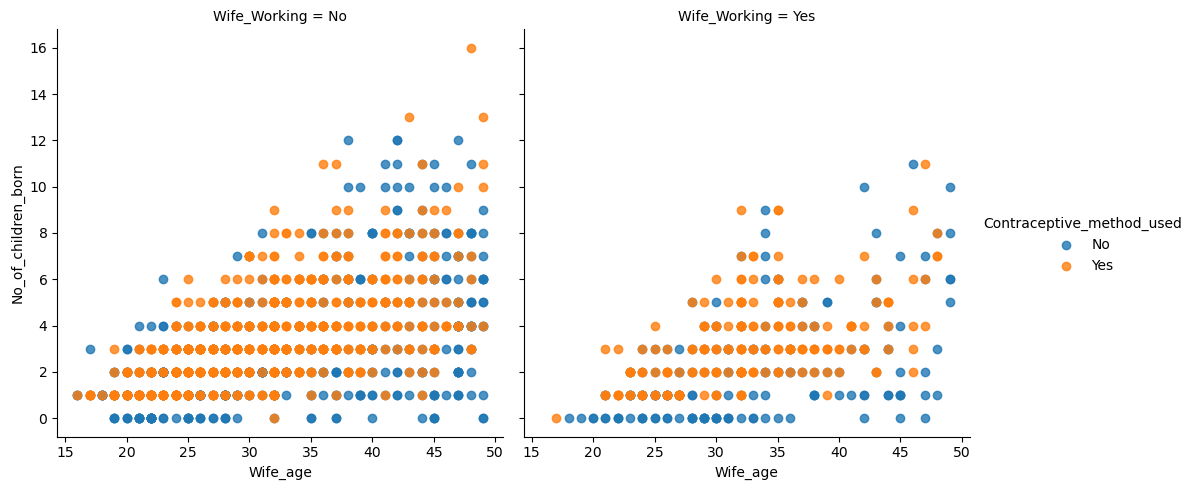

In [28]:
sns.lmplot(x='Wife_age', y='No_of_children_born', data=wife_data, fit_reg=False, col='Wife_Working', hue='Contraceptive_method_used');

The amount of contraceptive_method_used by  non working wife  is more than working wife

both working and non working wife , who dont have children are not using contraceptive_method

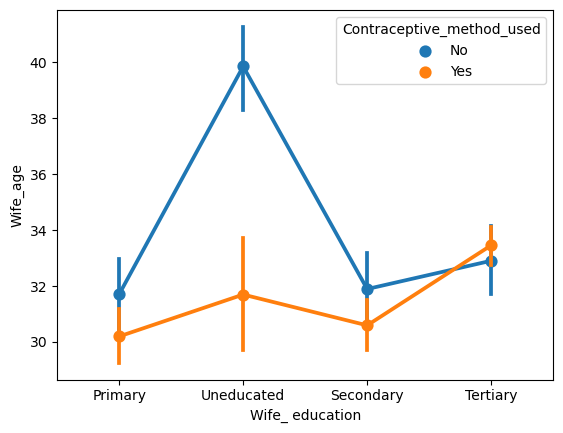

In [29]:
sns.pointplot(x='Wife_ education', y='Wife_age', data = wife_data,hue='Contraceptive_method_used');

### Plot a series of scatterplots between the continuous independent variables keeping the target variable as a hue.

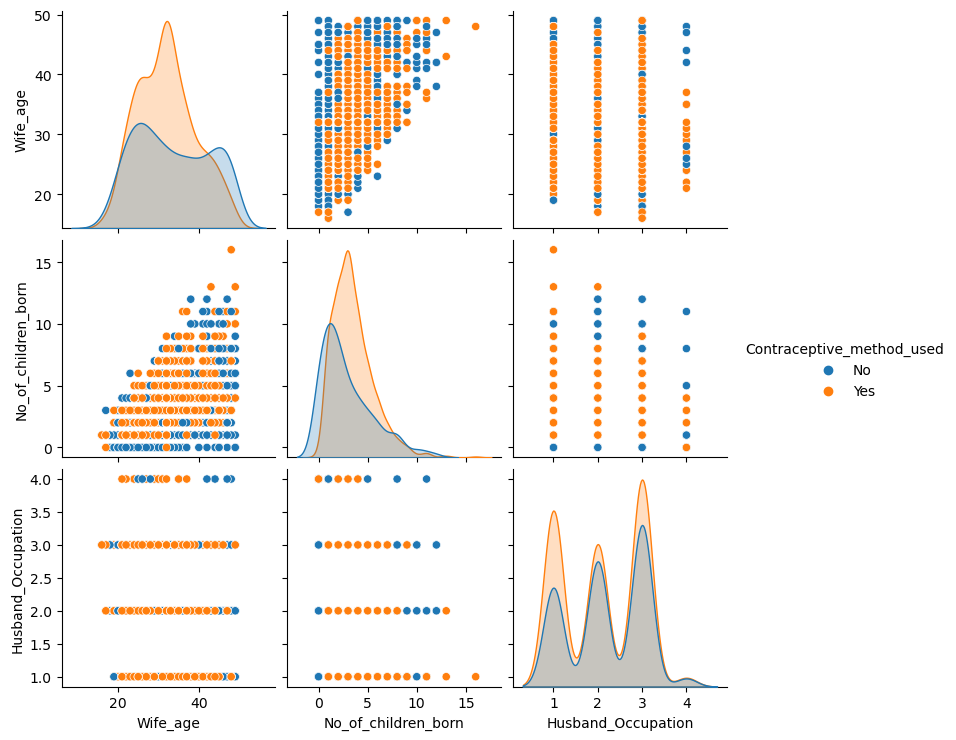

In [30]:
sns.pairplot(wife_data ,diag_kind='kde' ,hue='Contraceptive_method_used');

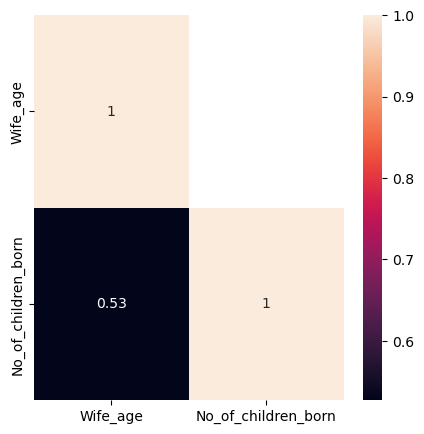

In [31]:
plt.figure(figsize=(5,5))
sns.heatmap(wife_data.corr(), annot=True,mask=np.triu(wife_data.corr(),+1));

### unique values for target variable

In [32]:
wife_data["Contraceptive_method_used"].value_counts(1)

Yes    0.57298
No     0.42702
Name: Contraceptive_method_used, dtype: float64

### Encoding the data

In [33]:
## Converting the 'Contraceptive method used ' Variable into numeric by using the LabelEncoder functionality inside sklearn.
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()

In [34]:
## Applying the created Label Encoder object for the target class
## Assigning the no and yes

wife_data['Contraceptive_method_used'] = LE.fit_transform(wife_data['Contraceptive_method_used'])
wife_data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,Primary,Secondary,3,Scientology,No,2,High,Exposed,0
1,45,Uneducated,Secondary,10,Scientology,No,3,Very High,Exposed,0
2,43,Primary,Secondary,7,Scientology,No,3,Very High,Exposed,0
3,42,Secondary,Primary,9,Scientology,No,3,High,Exposed,0
4,36,Secondary,Secondary,8,Scientology,No,3,Low,Exposed,0


In [35]:
wife_dummy = pd.get_dummies(wife_data,drop_first=True)
wife_dummy.head()

,Wife_age,No_of_children_born,Contraceptive_method_used,Wife_ education_Secondary,Wife_ education_Tertiary,Wife_ education_Uneducated,Husband_education_Secondary,Husband_education_Tertiary,Husband_education_Uneducated,Wife_religion_Scientology,Wife_Working_Yes,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_Low,Standard_of_living_index_Very High,Standard_of_living_index_Very Low,Media_exposure _Not-Exposed
0,24,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,45,10,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
2,43,7,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,42,9,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,36,8,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [156]:
wife_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Wife_age                            1473 non-null   int32
 1   No_of_children_born                 1473 non-null   int32
 2   Contraceptive_method_used           1473 non-null   int32
 3   Wife_ education_Secondary           1473 non-null   uint8
 4   Wife_ education_Tertiary            1473 non-null   uint8
 5   Wife_ education_Uneducated          1473 non-null   uint8
 6   Husband_education_Secondary         1473 non-null   uint8
 7   Husband_education_Tertiary          1473 non-null   uint8
 8   Husband_education_Uneducated        1473 non-null   uint8
 9   Wife_religion_Scientology           1473 non-null   uint8
 10  Wife_Working_Yes                    1473 non-null   uint8
 11  Husband_Occupation_2                1473 non-null   uint8
 12  Husban

### Logistic Regression Model building

In [36]:
wife_dummy.columns

Index(['Wife_age', 'No_of_children_born', 'Contraceptive_method_used',
       'Wife_ education_Secondary', 'Wife_ education_Tertiary',
       'Wife_ education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2',
       'Husband_Occupation_3', 'Husband_Occupation_4',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure _Not-Exposed'],
      dtype='object')

### seoerate X and y

In [37]:
# Copy all the predictor variables into X dataframe
X = wife_dummy.drop('Contraceptive_method_used', axis=1)

# Copy target into the y dataframe. 
y = wife_dummy['Contraceptive_method_used']

### Splitting Data into Train and Test

In [38]:
# Split X and y into training and test set in 70:30 ratio
# Stratify means maintain the same proportion of Y in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=wife_dummy['Contraceptive_method_used'])

In [39]:
y_train.value_counts(1)

1    0.57323
0    0.42677
Name: Contraceptive_method_used, dtype: float64

In [40]:
y_test.value_counts(normalize=True)

1    0.572398
0    0.427602
Name: Contraceptive_method_used, dtype: float64

In [41]:
# Fit the Logistic Regression model
# n_jobs means parallel processing
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=-1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    4.6s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty='none',
                   solver='newton-cg', verbose=True)

### Pridiction on train and test data

In [42]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [43]:
ytrain_predict

array([1, 1, 1, ..., 1, 0, 1])

In [44]:
ytest_predict


array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,

### Pridicted Probabilities

In [45]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.267188,0.732812
1,0.495328,0.504672
2,0.265623,0.734377
3,0.235643,0.764357
4,0.346744,0.653256


In [46]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.206205,0.793795
1,0.882759,0.117241
2,0.972225,0.027775
3,0.352366,0.647634
4,0.264268,0.735732


### Model Evaluation¶

In [47]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6896217264791464

In [48]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6538461538461539

### AUC and ROC for the train data¶


AUC: 0.723


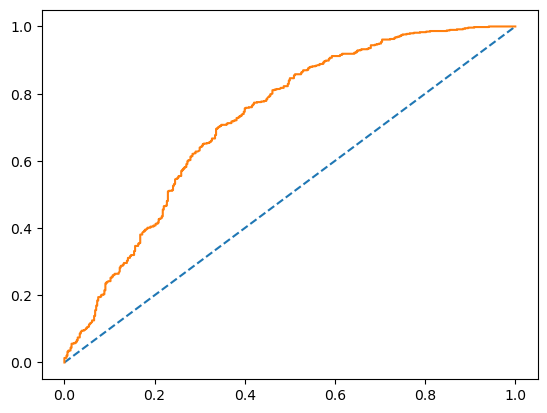

In [49]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1] #all the rows, first column
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.723


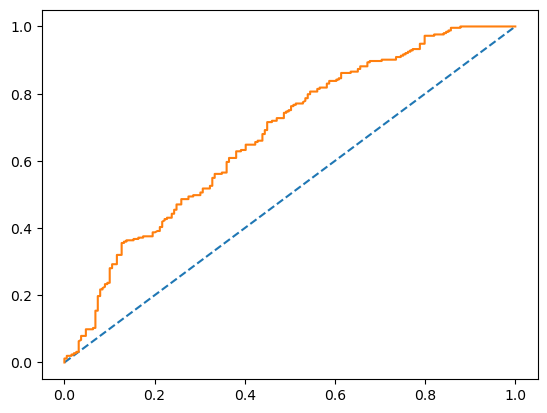

In [50]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the train data

In [51]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[221, 219],
       [101, 490]], dtype=int64)

In [52]:
tn, fp, fn, tp = confusion_matrix(y_train, ytrain_predict).ravel()

In [53]:
tn,fp,fn,tp

(221, 219, 101, 490)

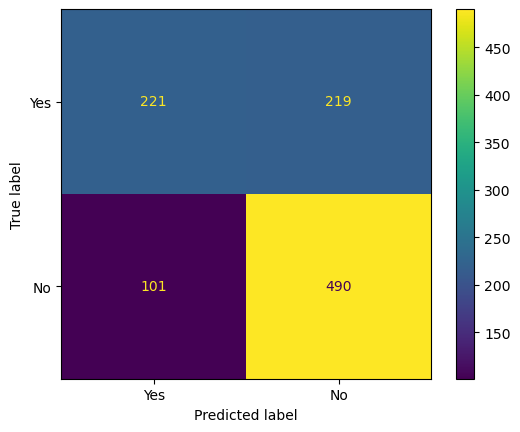

In [54]:
display_cm =ConfusionMatrixDisplay (confusion_matrix=cm, display_labels= ["Yes", "No"])
display_cm.plot();

In [55]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       440
           1       0.69      0.83      0.75       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031



### Confusion Matrix for Test data¶

In [56]:
confusion_matrix(y_test, ytest_predict)

array([[ 86, 103],
       [ 50, 203]], dtype=int64)

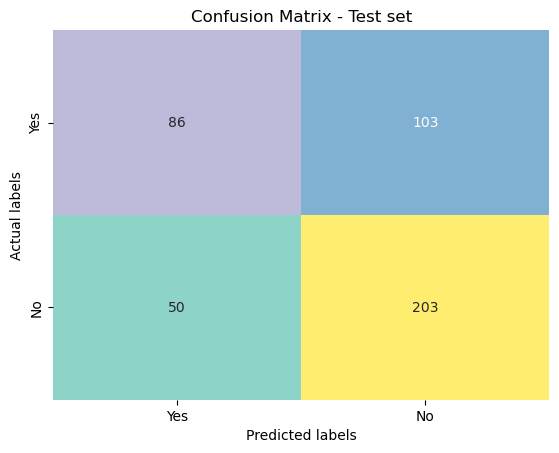

In [57]:
# Confusion Matrix on Test data
cm = metrics.confusion_matrix(y_test, ytest_predict)
sns.heatmap(cm, annot=True, fmt='.0f', cmap= 'Set3',
xticklabels = ["Yes","No"],
yticklabels = ["Yes","No"], cbar =False)
               
plt.title("Confusion Matrix - Test set")
plt.ylabel('Actual labels')
plt.xlabel ('Predicted labels')
plt.show()

In [58]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       189
           1       0.66      0.80      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442



### Applying GridSearchCV for Logistic Regression

In [59]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [60]:
model = LogisticRegression(max_iter=100000,n_jobs=-1)

In [61]:

grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [62]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=-1),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [63]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=-1, solver='sag')


In [64]:
best_model = grid_search.best_estimator_

In [65]:
best_model

LogisticRegression(max_iter=100000, n_jobs=-1, solver='sag')

In [66]:
# Prediction on the train set

ytrain_predict_best = best_model.predict(X_train)
ytest_predict_best = best_model.predict(X_test)

In [67]:
# Getting the probabilities on the test set

ytest_predict_prob =best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.205227,0.794773
1,0.870052,0.129948
2,0.969010,0.030990
3,0.350043,0.649957
4,0.267245,0.732755


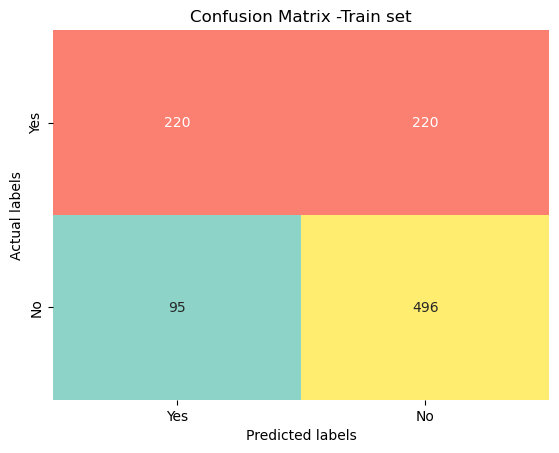

In [68]:
## Confusion matrix on the training data
cm1 = metrics.confusion_matrix(y_train, ytrain_predict_best)
sns.heatmap(cm1, annot=True, fmt='.0f', cmap= 'Set3',
xticklabels = ["Yes","No"],
yticklabels = ["Yes","No"], cbar =False)
               
plt.title("Confusion Matrix -Train set")
plt.ylabel('Actual labels')
plt.xlabel ('Predicted labels')
plt.show()

In [69]:
print(classification_report(y_train, ytrain_predict_best));

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       440
           1       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.70      0.67      0.67      1031
weighted avg       0.70      0.69      0.68      1031



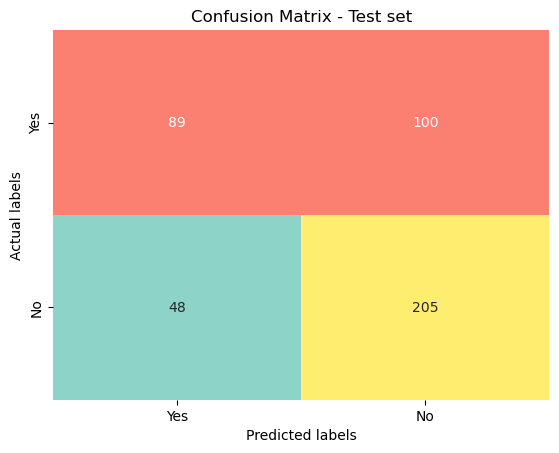

In [70]:
# Confusion Matrix on Test data
cm2 = metrics.confusion_matrix(y_test, ytest_predict_best)
sns.heatmap(cm2, annot=True, fmt='.0f', cmap= 'Set3',
xticklabels = ["Yes","No"],
yticklabels = ["Yes","No"], cbar =False)
               
plt.title("Confusion Matrix - Test set")
plt.ylabel('Actual labels')
plt.xlabel ('Predicted labels')
plt.show()

In [71]:
print(classification_report(y_test, ytest_predict_best));

              precision    recall  f1-score   support

           0       0.65      0.47      0.55       189
           1       0.67      0.81      0.73       253

    accuracy                           0.67       442
   macro avg       0.66      0.64      0.64       442
weighted avg       0.66      0.67      0.65       442



### Overall accuracy of the model – 68% of total predictions are correct

# Building LDA model

In [72]:
# For Modeling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Model Evaluation
from sklearn import metrics, model_selection

# Scaling the dataset
from sklearn.preprocessing import scale

In [73]:
wife_dummy.columns

Index(['Wife_age', 'No_of_children_born', 'Contraceptive_method_used',
       'Wife_ education_Secondary', 'Wife_ education_Tertiary',
       'Wife_ education_Uneducated', 'Husband_education_Secondary',
       'Husband_education_Tertiary', 'Husband_education_Uneducated',
       'Wife_religion_Scientology', 'Wife_Working_Yes', 'Husband_Occupation_2',
       'Husband_Occupation_3', 'Husband_Occupation_4',
       'Standard_of_living_index_Low', 'Standard_of_living_index_Very High',
       'Standard_of_living_index_Very Low', 'Media_exposure _Not-Exposed'],
      dtype='object')

### Creating a copy of the original data frame¶

In [74]:
data_df= wife_data.copy()

In [75]:
data_df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,Primary,Secondary,3,Scientology,No,2,High,Exposed,0
1,45,Uneducated,Secondary,10,Scientology,No,3,Very High,Exposed,0
2,43,Primary,Secondary,7,Scientology,No,3,Very High,Exposed,0
3,42,Secondary,Primary,9,Scientology,No,3,High,Exposed,0
4,36,Secondary,Secondary,8,Scientology,No,3,Low,Exposed,0


### Converting Object variable  for Linear Discriminant Analysis

In [76]:
data_df['Wife_ education']=np.where(data_df['Wife_ education'] =='Uneducated', 0, data_df['Wife_ education'])
data_df['Wife_ education']=np.where(data_df['Wife_ education'] =='Primary', 1, data_df['Wife_ education'])
data_df['Wife_ education']=np.where(data_df['Wife_ education'] =='Secondary', 2, data_df['Wife_ education'])
data_df['Wife_ education']=np.where(data_df['Wife_ education'] =='Tertiary', 3, data_df['Wife_ education'])

In [77]:
data_df['Husband_education']=np.where(data_df['Husband_education'] =='Uneducated', 0, data_df['Husband_education'])
data_df['Husband_education']=np.where(data_df['Husband_education'] =='Primary', 1, data_df['Husband_education'])
data_df['Husband_education']=np.where(data_df['Husband_education'] =='Secondary', 2, data_df['Husband_education'])
data_df['Husband_education']=np.where(data_df['Husband_education'] =='Tertiary', 3, data_df['Husband_education'])

In [78]:
data_df['Wife_religion']=np.where(data_df['Wife_religion'] =='Non-Scientology', 0, data_df['Wife_religion'])
data_df['Wife_religion']=np.where(data_df['Wife_religion'] =='Scientology', 1, data_df['Wife_religion'])

In [79]:
data_df['Wife_Working']=np.where(data_df['Wife_Working'] =='No', 0, data_df['Wife_Working'])
data_df['Wife_Working']=np.where(data_df['Wife_Working'] =='Yes', 0, data_df['Wife_Working'])

In [80]:
data_df['Standard_of_living_index']=np.where(data_df['Standard_of_living_index'] =='Very Low', 0, data_df['Standard_of_living_index'])
data_df['Standard_of_living_index']=np.where(data_df['Standard_of_living_index'] =='Low', 1, data_df['Standard_of_living_index'])
data_df['Standard_of_living_index']=np.where(data_df['Standard_of_living_index'] =='High', 2, data_df['Standard_of_living_index'])
data_df['Standard_of_living_index']=np.where(data_df['Standard_of_living_index'] =='Very High', 3, data_df['Standard_of_living_index'])

In [81]:
data_df['Media_exposure ']=np.where(data_df['Media_exposure '] =='Not-Exposed', 0, data_df['Media_exposure '])
data_df['Media_exposure ']=np.where(data_df['Media_exposure '] =='Exposed', 1, data_df['Media_exposure '])

In [82]:
data_df['Contraceptive_method_used']=np.where(data_df['Contraceptive_method_used'] =='No', 0, data_df['Contraceptive_method_used'])
data_df['Contraceptive_method_used']=np.where(data_df['Contraceptive_method_used'] =='Yes', 1, data_df['Contraceptive_method_used'])

### Seperate X and Y

In [83]:
X1 = data_df.drop('Contraceptive_method_used',axis=1)
Y1 = data_df.pop('Contraceptive_method_used')

### Splitting Data into Train and Test(70:30)

In [84]:
X_train1,X_test1,Y_train1,Y_test1 = model_selection.train_test_split(X1,Y1,test_size=0.30,random_state=1,stratify = Y1)

In [85]:
# Checking on the split
print('Number of rows and columns of the training set for the independent variables:',X_train1.shape)
print('Number of rows and columns of the training set for the dependent variable:',Y_train1.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test1.shape)
print('Number of rows and columns of the test set for the dependent variable:',Y_test1.shape)

Number of rows and columns of the training set for the independent variables: (1031, 9)
Number of rows and columns of the training set for the dependent variable: (1031,)
Number of rows and columns of the test set for the independent variables: (442, 9)
Number of rows and columns of the test set for the dependent variable: (442,)


### Model Building

In [86]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train1,Y_train1)

### Get Coefficients and intercept for the Linear Discriminant Function

In [87]:
#intercept value
clf.intercept_ 

array([0.27479997])

In [88]:
#coefficients for the Linear Discriminant Function
clf.coef_

array([[-8.56473358e-02,  5.02149567e-01, -2.21628904e-02,
         3.19705859e-01, -4.05928703e-01,  6.38135616e-16,
         3.74102262e-02,  2.88837813e-01,  5.98302895e-01]])

In [89]:
X_train1.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure '],
      dtype='object')

In [90]:
## Getting the equation
round(pd.DataFrame(clf.coef_.reshape(1,-1) ,columns=X_train1.columns), 2).T

,0
Wife_age,-0.09
Wife_ education,0.50
Husband_education,-0.02
No_of_children_born,0.32
Wife_religion,-0.41
Wife_Working,0.00
Husband_Occupation,0.04
Standard_of_living_index,0.29
Media_exposure,0.60


In [91]:
for i in range (0, X_train1.shape[1]):
    print('{} * {}'. format (np.round(clf.coef_[0][i],2),X_train1.columns[i]),end=' (+) ')

-0.09 * Wife_age (+) 0.5 * Wife_ education (+) -0.02 * Husband_education (+) 0.32 * No_of_children_born (+) -0.41 * Wife_religion (+) 0.0 * Wife_Working (+) 0.04 * Husband_Occupation (+) 0.29 * Standard_of_living_index (+) 0.6 * Media_exposure  (+) 

In [92]:
a=clf.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.09,  0.5 , -0.02,  0.32, -0.41,  0.  ,  0.04,  0.29,  0.6 ]])

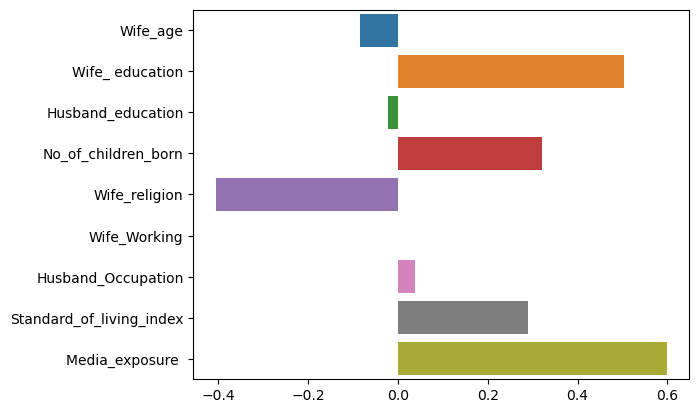

In [93]:
# Coefficient values- 
sns.barplot(x=[i for i in clf.coef_[0]],y=X_train1.columns)
plt.show()

predictor 'Media_exposure' has the largest magnitude thus this helps in classifying the best


predictor 'Husband_education' has the smallest magnitude thus this helps in classifying the least

### Discriminant Scores

In [94]:
Scores=clf.decision_function(X_train1)
Scores=pd.DataFrame(Scores)
Scores.columns=["LDA_ZScore"]
Scores.head(10)

,LDA_ZScore
0,1.180916
1,0.101211
2,1.284508
3,1.029461
4,0.887805
5,0.070556
6,-0.708975
7,1.412506
8,0.940836
9,1.658046


### Pridiction

In [95]:
# Train Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train1)

In [96]:
# Train Data Probability Prediction
pred_prob_train = model.predict_proba(X_train1)
pred_prob_train

array([[0.23488751, 0.76511249],
       [0.47471879, 0.52528121],
       [0.21678383, 0.78321617],
       ...,
       [0.33984436, 0.66015564],
       [0.89095639, 0.10904361],
       [0.2088007 , 0.7911993 ]])

In [97]:
Posterior=pd.DataFrame(pred_prob_train)
print(Posterior.head(10))

          0         1
0  0.234888  0.765112
1  0.474719  0.525281
2  0.216784  0.783216
3  0.263189  0.736811
4  0.291563  0.708437
5  0.482368  0.517632
6  0.670175  0.329825
7  0.195839  0.804161
8  0.280732  0.719268
9  0.160025  0.839975


In [98]:
pred_class_train = pd.DataFrame(pred_class_train)
pred_class_train.head(10)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,0
7,1
8,1
9,1


In [99]:
#Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test1)

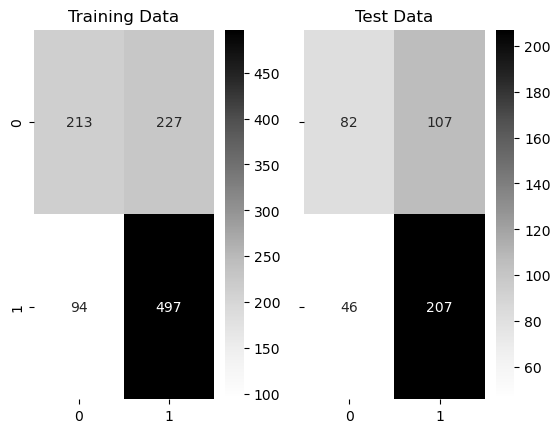

In [100]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(Y_train1,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(Y_test1,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Train Data and Test Data Classification Report Comparison

In [101]:
print('Classification Report of the training data:\n\n',metrics.classification_report(Y_train1,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(Y_test1,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.69      0.48      0.57       440
           1       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.66      0.66      1031
weighted avg       0.69      0.69      0.68      1031
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.43      0.52       189
           1       0.66      0.82      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.62       442
weighted avg       0.65      0.65      0.64       442
 



### Probability prediction for the train and test data

In [102]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train1)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test1)

AUC for the Training Data: 0.713
AUC for the Test Data: 0.692


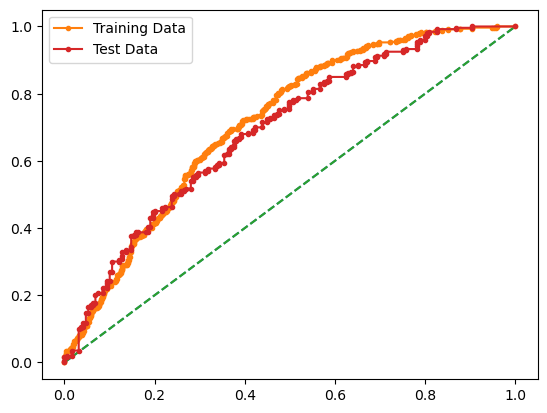

In [103]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(Y_train1,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train1,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(Y_test1,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test1,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

70.25 percent of train and test data is contributing for the output

The model accuracy on the training as well as the test set is about 67%, which is roughly the same proportion as the class 1 observations in the dataset. This model is affected by a class imbalance problem. Since we only have 1474 observations, if re-build the same LDA model with more number of data points, an even better model could be built.

### Inferences

Note :

Precison : tells us how many predictions are actually positive out of all the total positive predicted.

Recall : how many observations of positive class are actually predicted as positive.

For {Wife who are not used Contraceptive_method (Label 0 )}:

Precision (64%) – 64% of {Wife who are not used Contraceptive_method ,out of all {Wife who are not used Contraceptive_method are predicted .

Recall (43%) – Out of all the Wife who are not used Contraceptive_method , 43% of Wife who are not used Contraceptive_method .

For {Wife who are used Contraceptive_method (Label 1 )}:

Precision (66%) – 66% of Wife who are used Contraceptive_method ,out of all Wife who are used Contraceptive_method that are predicted .

Recall (82%) – Out of all the Wife who are used Contraceptive_method , 82% of Wife who are used Contraceptive_method have been predicted
correctly .

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

# Buildimg CART Model

In [104]:
wife_data.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24,Primary,Secondary,3,Scientology,No,2,High,Exposed,0
1,45,Uneducated,Secondary,10,Scientology,No,3,Very High,Exposed,0
2,43,Primary,Secondary,7,Scientology,No,3,Very High,Exposed,0
3,42,Secondary,Primary,9,Scientology,No,3,High,Exposed,0
4,36,Secondary,Secondary,8,Scientology,No,3,Low,Exposed,0


In [105]:
dt_model=wife_data.copy()

### Convert Object Feature types for CART¶

In [106]:
dt_model['Wife_ education']=np.where(dt_model['Wife_ education'] =='Uneducated', 0, dt_model['Wife_ education'])
dt_model['Wife_ education']=np.where(dt_model['Wife_ education'] =='Primary', 1, dt_model['Wife_ education'])
dt_model['Wife_ education']=np.where(dt_model['Wife_ education'] =='Secondary', 2, dt_model['Wife_ education'])
dt_model['Wife_ education']=np.where(dt_model['Wife_ education'] =='Tertiary', 3, dt_model['Wife_ education'])
dt_model['Husband_education']=np.where(dt_model['Husband_education'] =='Uneducated', 0, dt_model['Husband_education'])
dt_model['Husband_education']=np.where(dt_model['Husband_education'] =='Primary', 1, dt_model['Husband_education'])
dt_model['Husband_education']=np.where(dt_model['Husband_education'] =='Secondary', 2, dt_model['Husband_education'])
dt_model['Husband_education']=np.where(dt_model['Husband_education'] =='Tertiary', 3, dt_model['Husband_education'])
dt_model['Wife_religion']=np.where(dt_model['Wife_religion'] =='Non-Scientology', 0, dt_model['Wife_religion'])
dt_model['Wife_religion']=np.where(dt_model['Wife_religion'] =='Scientology', 1, dt_model['Wife_religion'])
dt_model['Wife_Working']=np.where(dt_model['Wife_Working'] =='No', 0, dt_model['Wife_Working'])
dt_model['Wife_Working']=np.where(dt_model['Wife_Working'] =='Yes', 0, dt_model['Wife_Working'])
dt_model['Media_exposure ']=np.where(dt_model['Media_exposure '] =='Not-Exposed', 0, dt_model['Media_exposure '])
dt_model['Media_exposure ']=np.where(dt_model['Media_exposure '] =='Exposed', 1, dt_model['Media_exposure '])
dt_model['Contraceptive_method_used']=np.where(dt_model['Contraceptive_method_used'] =='No', 0, dt_model['Contraceptive_method_used'])
dt_model['Contraceptive_method_used']=np.where(dt_model['Contraceptive_method_used'] =='Yes', 1, dt_model['Contraceptive_method_used'])
dt_model['Standard_of_living_index']=np.where(dt_model['Standard_of_living_index'] =='Very Low', 0, dt_model['Standard_of_living_index'])
dt_model['Standard_of_living_index']=np.where(dt_model['Standard_of_living_index'] =='Low', 1, dt_model['Standard_of_living_index'])
dt_model['Standard_of_living_index']=np.where(dt_model['Standard_of_living_index'] =='High', 2, dt_model['Standard_of_living_index'])
dt_model['Standard_of_living_index']=np.where(dt_model['Standard_of_living_index'] =='Very High', 3, dt_model['Standard_of_living_index'])

### Extracting the target column into separate vectors for training set and test set¶

In [107]:
X2 = dt_model.drop('Contraceptive_method_used',axis=1)
Y2 = dt_model.pop('Contraceptive_method_used')

### Building a Decision Tree Classifier
Splitting data into training and test set

In [108]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, train_labels2, test_labels2 = train_test_split(X2, Y2, test_size=.30, stratify= Y2, random_state=1)

In [109]:

from sklearn.tree import DecisionTreeClassifier
dt_model1 = DecisionTreeClassifier(criterion = 'gini', random_state=1)

### Building model

In [110]:
dt_model1.fit(X_train2, train_labels2)

DecisionTreeClassifier(random_state=1)

### Text and value represtation¶

In [114]:
from sklearn import tree
text_representation = tree.export_text(dt_model1)
print(text_representation)

|--- feature_3 <= 0.50
|   |--- feature_0 <= 17.50
|   |   |--- class: 1
|   |--- feature_0 >  17.50
|   |   |--- feature_6 <= 3.50
|   |   |   |--- class: 0
|   |   |--- feature_6 >  3.50
|   |   |   |--- feature_7 <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  1.50
|   |   |   |   |--- class: 1
|--- feature_3 >  0.50
|   |--- feature_0 <= 37.50
|   |   |--- feature_3 <= 2.50
|   |   |   |--- feature_0 <= 34.50
|   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 21.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  21.00
|   |   |   |   |   |   |   |   |--- fe

### Variable Importance

In [115]:
dt_model1.feature_importances_

array([0.28949383, 0.11702192, 0.06309588, 0.28266833, 0.02517   ,
       0.        , 0.10913366, 0.10158853, 0.01182786])

### Important features in  dataset

In [117]:
print (pd.DataFrame(dt_model1.feature_importances_, columns = ["Imp"], index = X_train2.columns).sort_values('Imp',ascending=False))

                               Imp
Wife_age                  0.289494
No_of_children_born       0.282668
Wife_ education           0.117022
Husband_Occupation        0.109134
Standard_of_living_index  0.101589
Husband_education         0.063096
Wife_religion             0.025170
Media_exposure            0.011828
Wife_Working              0.000000


In [118]:
Feature_imp = pd.DataFrame()
Feature_imp["Features"]= X_train2.columns
Feature_imp['Importance'] = round(pd.Series(dt_model1.feature_importances_), 3) #series has same datatype
Feature_imp_sorted = Feature_imp.sort_values(by = "Importance", ascending =False) #sort in descending
Feature_imp_sorted

,Features,Importance
0,Wife_age,0.289
3,No_of_children_born,0.283
1,Wife_ education,0.117
6,Husband_Occupation,0.109
7,Standard_of_living_index,0.102
2,Husband_education,0.063
4,Wife_religion,0.025
8,Media_exposure,0.012
5,Wife_Working,0.000


### Visualizing the feature importance

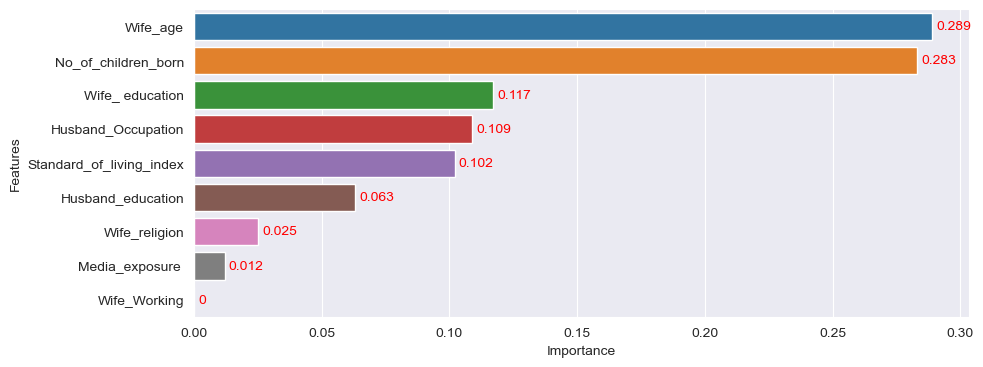

In [119]:
sns.set_style("darkgrid")
plt.figure(figsize= (10,4))
ax = sns.barplot(x = "Importance", y = "Features", data = Feature_imp_sorted);
ax.bar_label (ax.containers [0], label_type='edge', color = 'red', rotation =0, fontsize = 10, padding =3);

The values above are not gini gain, the model uses the concept of partial derivative to identify minimum error and extracting the importance of features.

It will remove each feature and see how much the model is falling / suffering.

The feature that leads model to suffer more is the most important column

### Predicting Test Data

In [120]:
y_predict2 = dt_model1.predict(X_test2)

In [121]:
y_predict2.shape

(442,)

In [123]:
dt_model1.score(X_test2,test_labels2)

0.6221719457013575

For this dataset, we don't have overfitting issues but usually for Decision Tree algo, we will have overfitting issue(train accuracy is way more than test accuracy) so we prune the decision tree.

### Regularising the Decision Tree

### Adding Tuning Parameters

In [124]:
# Exploring Parameters- Learn from data
from sklearn.model_selection import GridSearchCV

param_grid = {#'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 10, 15, 20],
              'min_samples_leaf':[5,10,15,20],
              #'min_samples_split':[50,100],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train2, train_labels2)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20]},
             verbose=True)

In [126]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       min_samples_leaf=10, random_state=1024)

In [127]:
reg_dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='auto', min_samples_split=50,
                       random_state=1024)
reg_dt_model.fit(X_train2, train_labels2)

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=10,
                       max_features='auto', min_samples_split=50,
                       random_state=1024)

In [128]:
reg_dt_model=grid_search.best_estimator_
reg_dt_model

DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=5,
                       min_samples_leaf=10, random_state=1024)

### Generating New Tree

In [131]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file= ld_tree_regularized , 
                                feature_names = list(X_train2), 
                                class_names = list(reg_dt_model.fit(X_train2, train_labels2)))

ld_tree_regularized.close()
dot_data

TypeError: 'DecisionTreeClassifier' object is not iterable

### Variable Importance

In [132]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train2.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.588085
Wife_age                  0.238702
Wife_ education           0.173213
Husband_education         0.000000
Wife_religion             0.000000
Wife_Working              0.000000
Husband_Occupation        0.000000
Standard_of_living_index  0.000000
Media_exposure            0.000000


### Important Feature in  dataset¶

In [133]:
Feature_imp_reg = pd. DataFrame()
Feature_imp_reg["Features"]= X_train2.columns
Feature_imp_reg['Importance'] = round (pd.Series(reg_dt_model.feature_importances_),3)
Feature_imp_reg_sorted = Feature_imp_reg.sort_values (by ="Importance", ascending = False)
Feature_imp_reg_sorted

,Features,Importance
3,No_of_children_born,0.588
0,Wife_age,0.239
1,Wife_ education,0.173
2,Husband_education,0.000
4,Wife_religion,0.000
5,Wife_Working,0.000
6,Husband_Occupation,0.000
7,Standard_of_living_index,0.000
8,Media_exposure,0.000


### Visualising the Feature Importance - Regularised¶

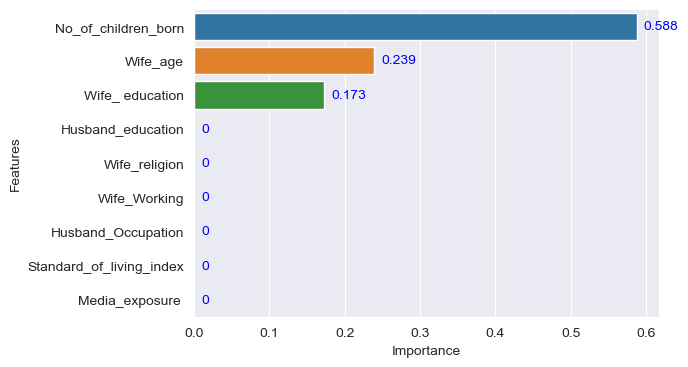

In [134]:
sns.set_style("darkgrid")
plt.figure(figsize= (6,4))
ax = sns.barplot(x = "Importance", y = "Features", data =Feature_imp_reg_sorted);
ax.bar_label (ax.containers [0], label_type='edge', color = 'blue', rotation=0, fontsize = 10, padding =5);

### Predicting on Train and Test dataset

In [135]:
ytrain_predict2 = reg_dt_model.predict(X_train2)
ytest_predict2 = reg_dt_model.predict(X_test2)

### Getting the Predicted Classes

In [136]:
ytest_predict2

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,

### Getting the Predicted Probabilities

In [137]:
ytest_predict_prob2=reg_dt_model.predict_proba(X_test2)
ytest_predict_prob2

array([[0.34      , 0.66      ],
       [0.82352941, 0.17647059],
       [0.82352941, 0.17647059],
       [0.38175676, 0.61824324],
       [0.38175676, 0.61824324],
       [0.34      , 0.66      ],
       [0.82352941, 0.17647059],
       [0.38175676, 0.61824324],
       [0.34      , 0.66      ],
       [0.34      , 0.66      ],
       [0.34      , 0.66      ],
       [0.38175676, 0.61824324],
       [0.38175676, 0.61824324],
       [0.23450135, 0.76549865],
       [0.23450135, 0.76549865],
       [0.23450135, 0.76549865],
       [0.38175676, 0.61824324],
       [0.38175676, 0.61824324],
       [0.38175676, 0.61824324],
       [0.23450135, 0.76549865],
       [0.23450135, 0.76549865],
       [0.38175676, 0.61824324],
       [0.23450135, 0.76549865],
       [0.23450135, 0.76549865],
       [0.23450135, 0.76549865],
       [0.82352941, 0.17647059],
       [0.38175676, 0.61824324],
       [0.34      , 0.66      ],
       [0.38175676, 0.61824324],
       [0.38175676, 0.61824324],
       [0.

In [138]:
 pd.DataFrame(ytest_predict_prob2).head()

,0,1
0,0.340000,0.660000
1,0.823529,0.176471
2,0.823529,0.176471
3,0.381757,0.618243
4,0.381757,0.618243


### Model Evaluation

### AUC and ROC for the training data

AUC: 0.743


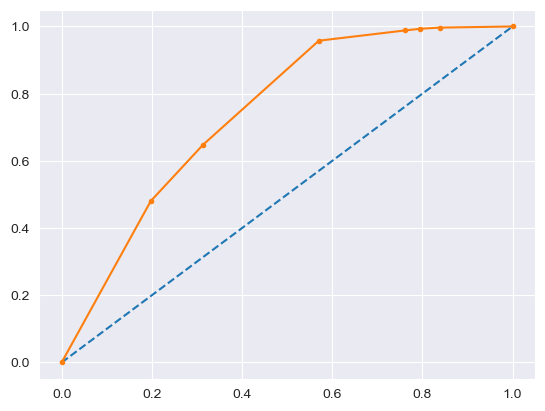

In [139]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels2, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### AUC and ROC for the test data

AUC: 0.713


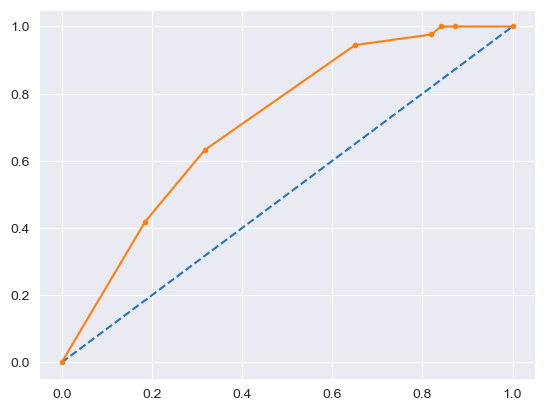

In [140]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test2)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels2, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels2, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Confusion Matrix for the train data

In [141]:
confusion_matrix(train_labels2, ytrain_predict2)

array([[189, 251],
       [ 25, 566]], dtype=int64)

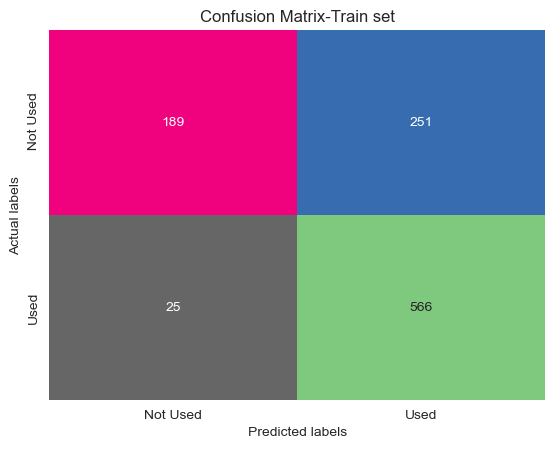

In [142]:
# Confusion Matrix on Train data
cm = metrics.confusion_matrix(train_labels2, ytrain_predict2)
sns.heatmap (cm, annot=True, fmt='.0f', cmap='Accent_r', 
             xticklabels = ["Not Used", "Used"],
             yticklabels = [" Not Used", "Used"], cbar =False) #zero float values, cbar-dont show bar
plt.title("Confusion Matrix-Train set")
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [143]:
reg_dt_model.score(X_train2,train_labels2) 

0.7322987390882638

In [144]:
print(classification_report(train_labels2, ytrain_predict2))

              precision    recall  f1-score   support

           0       0.88      0.43      0.58       440
           1       0.69      0.96      0.80       591

    accuracy                           0.73      1031
   macro avg       0.79      0.69      0.69      1031
weighted avg       0.77      0.73      0.71      1031



Accuracy: 73% of the times the model rightly classified the wife is used Contraceptive_method_used or not

Recall(1): Out of total wife is used wife is used Contraceptive_method_used, 96% of the times the model rightly predict the wife is used Contraceptive_method

Precision(1): Out of total wife is used Contraceptive_method_used prediction, 69% of the times the model rightly predicted the wife is used Contraceptive_method

### Confusion Matrix for test data

In [145]:
confusion_matrix(test_labels2, ytest_predict2)

array([[ 66, 123],
       [ 14, 239]], dtype=int64)

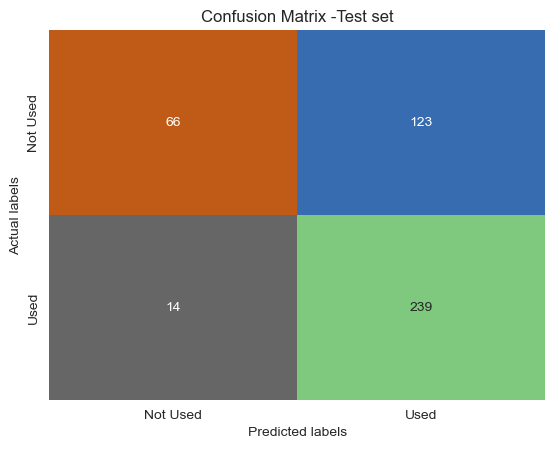

In [150]:
# Confusion Matrix on Test data
cm = metrics.confusion_matrix (test_labels2, ytest_predict2)
sns.heatmap (cm, annot=True, fmt='.0f', cmap='Accent_r',
              xticklabels = ["Not Used", "Used"],
              yticklabels = ["Not Used", "Used"], cbar =False)
plt.title("Confusion Matrix -Test set")
plt.ylabel ('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

In [151]:
#Test Data Accuracy
reg_dt_model.score(X_test2,test_labels2)

0.6900452488687783

In [152]:

print(classification_report(test_labels2, ytest_predict2))

              precision    recall  f1-score   support

           0       0.82      0.35      0.49       189
           1       0.66      0.94      0.78       253

    accuracy                           0.69       442
   macro avg       0.74      0.65      0.63       442
weighted avg       0.73      0.69      0.65       442



Accuracy: 69% of the times the model rightly classified the wife is used Contraceptive_method_used or not

Recall(1): Out of total wife is used wife is used Contraceptive_method_used, 94% of the times the model rightly predict the wife is used Contraceptive_method

Precision(1): Out of total wife is used Contraceptive_method_used prediction, 66% of the times the model rightly predicted the wife is used Contraceptive_method

# Conclusion
Accuracy on the Training Data: 73%  
Accuracy on the Test Data: 69%

AUC on the Training Data: 74.3%

AUC on the Test: 71.3%

Accuracy, AUC, Precision and Recall for test data is almost inline with training data. 
This proves no overfitting or underfitting has happened, and overall the model is a good model for classification

Also,here analysing the metric recall is more important because, we don't want to miss out on those wife who are used Contraceptive_method, having a predictive power to catch the Contraceptive_method would help the Republic of Indonesia Ministry of Health to be more proactive in their approach.